## Task 1: Data Handling

In [1]:
import pandas as pd
import numpy as np
import pickle
import os

import seaborn as sns
import matplotlib.pyplot as plt


# processing and measures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
BASE_DIR = "beijing+multi+site+air+quality+data/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228"

In [3]:
# check the files available
os.listdir(BASE_DIR)

['PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv']

In [4]:
# check the files size for each 
for each_file_name in os.listdir(BASE_DIR):
    curr_ = pd.read_csv(f"{BASE_DIR}/{each_file_name}")
    file_name = each_file_name.split("_")[2]
    print(f"Data of {file_name} has a size {curr_.shape}")

Data of Dongsi has a size (35064, 18)
Data of Changping has a size (35064, 18)
Data of Guanyuan has a size (35064, 18)
Data of Wanshouxigong has a size (35064, 18)
Data of Huairou has a size (35064, 18)
Data of Aotizhongxin has a size (35064, 18)
Data of Wanliu has a size (35064, 18)
Data of Tiantan has a size (35064, 18)
Data of Dingling has a size (35064, 18)
Data of Shunyi has a size (35064, 18)
Data of Nongzhanguan has a size (35064, 18)
Data of Gucheng has a size (35064, 18)


### Data and Merging Process
- From above, the data consists of hourly air-quality data collected from 12 different monitoring sites in Beijing, spanning from March 1st, 2013 to February 28th, 2017. Each CSV file contains 18 columns, with data on various pollutants, meteorological conditions, and site-specific information.

- To merge these datasets, we first load each CSV and append each dataframe to a list. Then, we concatenate all the individual dataframes into a single dataframe, which combines the data along the rows while resetting the index to maintain a continuous numbering.
- This help have a merged data which is ready for exporation and analysis.

In [5]:
df_lists = []

for each_file_name in os.listdir(BASE_DIR):
    curr_df_ = pd.read_csv(f"{BASE_DIR}/{each_file_name}")
    df_lists.append(curr_df_)
print("Completed Loading the datasets")

Completed Loading the datasets


In [6]:
# 

In [7]:
# merge the dataset into a single df
df = pd.concat(df_lists).reset_index(drop=True)

In [71]:
# save the data for later usage on app
df.to_csv("gui_app/data/merged_data.csv", index=False)

## Task 2: Exploratory Data Analysis (EDA)
- This part will involve;
    - Data pre-checkup
    - Exporation
    - Data Analysis and EDA.
 
### a) Fundamental data understanding

In [9]:
# check sample data
df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
333177,17602,2015,3,4,9,20.0,47.0,27.0,30.0,700.0,32.0,-0.3,1027.5,-21.8,0.0,ESE,0.9,Shunyi
409826,24123,2015,12,1,2,542.0,542.0,40.0,161.0,7900.0,2.0,0.1,1013.9,-2.6,0.0,NE,0.9,Gucheng
23382,23383,2015,10,31,6,25.0,46.0,3.0,53.0,700.0,2.0,0.6,1028.5,-2.3,0.0,SSW,0.4,Dongsi
32753,32754,2016,11,24,17,96.0,144.0,23.0,68.0,1700.0,13.0,3.2,1021.5,-10.8,0.0,S,1.3,Dongsi
335444,19869,2015,6,6,20,17.0,17.0,2.0,21.0,4000.0,91.0,22.2,1000.5,15.1,0.0,N,2.2,Shunyi


In [10]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [11]:
# check the number of records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [12]:
# check statistics information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,420768.0,17532.500000,10122.116943,1.0000,8766.75,17532.5,26298.25,35064.0
year,420768.0,2014.662560,1.177198,2013.0000,2014.00,2015.0,2016.00,2017.0
month,420768.0,6.522930,3.448707,1.0000,4.00,7.0,10.00,12.0
day,420768.0,15.729637,8.800102,1.0000,8.00,16.0,23.00,31.0
hour,420768.0,11.500000,6.922195,0.0000,5.75,11.5,17.25,23.0
PM2.5,412029.0,79.793428,80.822391,2.0000,20.00,55.0,111.00,999.0
PM10,414319.0,104.602618,91.772426,2.0000,36.00,82.0,145.00,999.0
SO2,411747.0,15.830835,21.650603,0.2856,3.00,7.0,20.00,500.0
NO2,408652.0,50.638586,35.127912,1.0265,23.00,43.0,71.00,290.0
CO,400067.0,1230.766454,1160.182716,100.0000,500.00,900.0,1500.00,10000.0


In [13]:
# check the number of columns
print(f"The Data has {df.shape[0]} total records and {df.shape[1]} columns ")

The Data has 420768 total records and 18 columns 


In [14]:
# check columns with missing data
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [15]:
# what percentage of data is missing on each of the records
df.isna().sum()/df.shape[0]

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.020769
PM10       0.015327
SO2        0.021439
NO2        0.028795
CO         0.049198
O3         0.031554
TEMP       0.000946
PRES       0.000934
DEWP       0.000958
RAIN       0.000927
wd         0.004330
WSPM       0.000756
station    0.000000
dtype: float64

In [16]:
# we have two columns with non-numerical, what are their values

# get to see columns which are non numerical
df.select_dtypes(include=["object"])

,wd,station
0,NNW,Dongsi
1,NW,Dongsi
2,NNW,Dongsi
3,N,Dongsi
4,NNW,Dongsi
...,...,...
420763,NNW,Gucheng
420764,NW,Gucheng
420765,N,Gucheng
420766,NE,Gucheng


In [17]:
# check unique counts
# for WD
df["wd"].value_counts()

wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64

In [18]:
# stations
df["station"].value_counts()

station
Dongsi           35064
Changping        35064
Guanyuan         35064
Wanshouxigong    35064
Huairou          35064
Aotizhongxin     35064
Wanliu           35064
Tiantan          35064
Dingling         35064
Shunyi           35064
Nongzhanguan     35064
Gucheng          35064
Name: count, dtype: int64

### Data Understanding Results
- The dataset includes records from 12 stations, each with 35,064 entries, resulting in a total of 420,768 records across all stations.
- The dataset contains 420,768 total records with 18 columns. These provides a detailed air quality and meteorological data collected from 12 monitoring stations in Beijing from March 1, 2013, to February 28, 2017.
- The columns in the dataset are a mix of pollutant concentrations like PM2.5, PM10, SO2, NO2, CO, O3 and also weather parameters liek  temperature, pressure, humidity, wind direction, and station identifiers.
- Each each row presents a hourly record of the data collected.
- All columns are numerical (consist of float and integer) except for `wind direction (wd)` and `station`


Below is a a summary of the dataset columns:

| Column   | Description                                      |
|----------|--------------------------------------------------|
| `No`     | Unique record identifier                         |
| `year`   | Year of the data entry                           |
| `month`  | Month of the data entry                          |
| `day`    | Day of the data entry                            |
| `hour`   | Hour of the data entry                           |
| `PM2.5`  | PM2.5 concentration (µg/m³)                      |
| `PM10`   | PM10 concentration (µg/m³)                       |
| `SO2`    | Sulfur dioxide concentration (ppb)               |
| `NO2`    | Nitrogen dioxide concentration (ppb)             |
| `CO`     | Carbon monoxide concentration (ppb)              |
| `O3`     | Ozone concentration (ppb)                        |
| `TEMP`   | Temperature (°C)                                  |
| `PRES`   | Atmospheric pressure (hPa)                       |
| `DEWP`   | Dew point temperature (°C)                        |
| `RAIN`   | Precipitation (mm)                               |
| `wd`     | Wind direction                                   |
| `WSPM`   | Wind speed (m/s)                                  |
| `station`| The monitoring station name (12 total)           |


### Missing Data Overview:
- **Missing Values**: The `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3` columns have missing values, with `CO` having the highest number of missing entries (20,701).
- **Wind Direction (`wd`)**: This column has significant missing data, with 18% of values missing.
- The remaining columns like `TEMP`, `PRES`, `DEWP`, `RAIN`, and `WSPM` also have some missing data, but the count is relatively low compared to pollutants or wind data.


- In summary the dataset has a comprehensive view of air quality and meteorological conditions in Beijing over a 4-year period, with hourly records across 12 stations. There are some missing values, particularly in pollutant data and wind direction, but the dataset is mostly complete. This information is crucial for further analysis, such as investigating pollution trends, correlations between pollutants and weather factors, and making predictions or recommendations for improving air quality.

### b) Data preprocessing:
- This part will majory focused on dealing with missing and feature engineering.


-
- To prepare the dataset for analysis, several data processing steps were performed.
    - First, missing values in the numerical columns were imputed with the mean of their respective columns in order to ensure that no data was lost during the analysis. Also, missing values in the `wd` (wind direction) column were filled using forward fill (`ffill`), which propagates the last valid observation forward to fill missing entries
    - For feature engineering, a new `datetime` column was created by combining the `year`, `month`, and `day` columns into a single datetime object, which facilitates time-based analysis.
    - Finally, the `No` column, which was only an identifier for each file and not a relevant feature for analysis, was dropped from the dataset to reduce unnecessary data and improve the focus of the analysis.
-

These preprocessing steps ensured that the data was clean and consistent.

In [19]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [20]:
# keep a copy of data
df_ = df.copy()

In [21]:
# check any duplicated entries
print(f"There are  {df.duplicated().sum()} duplicates in the dataset") 

There are  0 duplicates in the dataset


In [22]:
# The No. column is not a feature rather was identify for each file, we drop it
df.drop(columns = ["No"], inplace=True)

In [23]:
df[df.isna().sum(axis=1)>0]

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2,2013,3,1,2,7.0,7.0,NaN,17.0000,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,2013,3,1,3,3.0,3.0,5.0000,18.0000,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,2013,3,1,4,3.0,3.0,7.0000,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
74,2013,3,4,2,43.0,48.0,6.2832,20.1194,NaN,94.0,8.4,1018.7,-13.9,0.0,N,1.5,Dongsi
98,2013,3,5,2,95.0,133.0,NaN,71.0000,1399.0,102.0,4.7,1016.1,-10.6,0.0,S,0.0,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420665,2017,2,24,17,19.0,47.0,8.0000,NaN,500.0,71.0,10.4,1015.1,-13.7,0.0,NW,3.4,Gucheng
420666,2017,2,24,18,21.0,39.0,9.0000,NaN,500.0,62.0,9.4,1015.6,-13.8,0.0,NW,4.2,Gucheng
420667,2017,2,24,19,22.0,22.0,7.0000,NaN,600.0,37.0,9.0,1016.1,-14.1,0.0,WNW,3.0,Gucheng
420668,2017,2,24,20,24.0,47.0,8.0000,NaN,800.0,24.0,9.0,1016.5,-14.8,0.0,NW,4.2,Gucheng


In [24]:
# check if there is large different between means and medium in order to fill nulls
df.select_dtypes(exclude=["object"]).mean() - df.select_dtypes(exclude=["object"]).median()

year      -0.337440
month     -0.477070
day       -0.270363
hour       0.000000
PM2.5     24.793428
PM10      22.602618
SO2        8.830835
NO2        7.638586
CO       330.766454
O3        12.372271
TEMP      -0.961024
PRES       0.346982
DEWP      -0.609178
RAIN       0.064476
WSPM       0.329711
dtype: float64

In [25]:
df[df.select_dtypes(exclude=["object"]).columns] = df.select_dtypes(exclude=["object"]).fillna(df.select_dtypes(exclude=["object"]).mean())

In [26]:
# Fill missing using Forward fill
df["wd"]  = df["wd"].fillna(method='ffill')

In [27]:
# check if there are other missing data
df.isna().sum().any()

False

In [28]:
# Feature Engineering through combining year, month, day, and hour into a datetime column
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])

df.head(2)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,2013-03-01
1,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,2013-03-01


### c) Statistics/computation-based analysis and Visualisation:

- The major focus for exploratory data analysis (EDA) will be to gain insights into the seasonal variations and concentration levels of various air pollutants, such as PM2.5, PM10, NO2, and CO, across different times of the year.
- This part will analyze how these pollutants fluctuate over seasons, months, and hours of the day, uncovering any trends or patterns. - Also, we will compare the air temperature with pollutant concentrations to explore potential correlations between these conditions and air quality.
- This part will help provide a clearer picture on how air quality in Beijing is influenced by both seasonal changes and environmental conditions.

In [29]:
# create a copy of data to use
data = df.copy()

In [30]:
data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,2013,3,1,0,9.0,9.0,3.000000,17.000000,300.000000,89.000000,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,2013-03-01
1,2013,3,1,1,4.0,4.0,3.000000,16.000000,300.000000,88.000000,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,2013-03-01
2,2013,3,1,2,7.0,7.0,15.830835,17.000000,300.000000,60.000000,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,2013-03-01
3,2013,3,1,3,3.0,3.0,5.000000,18.000000,1230.766454,57.372271,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,2013-03-01
4,2013,3,1,4,3.0,3.0,7.000000,50.638586,200.000000,84.000000,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,2013-03-01


####  Q: What was the wind Direction with most hourly records count.

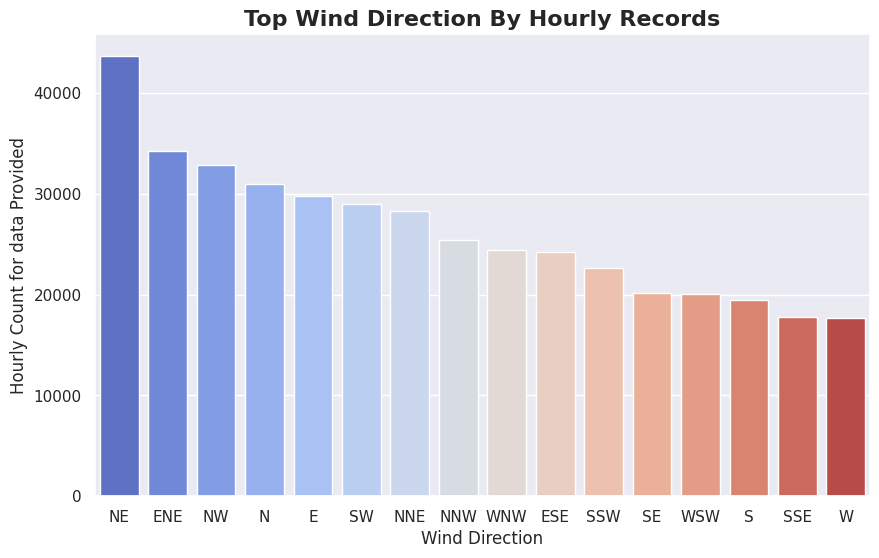

In [31]:
# check where the wind direction was mostly observed
wind_count_data= data['wd'].value_counts().sort_values(ascending=False)
# a bar chart show the results
plt.figure(figsize=(10, 6))
sns.barplot(x=wind_count_data.index, y=wind_count_data.values, palette='coolwarm')
plt.title('Top Wind Direction By Hourly Records', fontsize=16, fontweight='bold')
plt.xlabel('Wind Direction')
plt.ylabel('Hourly Count for data Provided')
plt.show()

##### Observation
- North Eastern is direction with most winds while West had the least.
- From the bar graph above, it can be clearly be seen that the Eastern and Nothern part are the directions with more counts than Western and Southen parts of Beijing.

#### Observation of how different features are distributed.

In [32]:
def plot_data_distribution(data, category='AIR'):
    """
    Parameters:
    - data (pd.DataFrame)
    - category (str): either ('AIR' or 'WEATHER'). 
                      'AIR' plots air quality components, 
                      'WEATHER' plots weather-related parameters (e.g., precipitation, temperature).
    """
    if category == 'AIR':
        variables = ['NO2', 'O3', 'SO2']
        category_title = "Air Quality Components"
        super_title = "Distribution and Boxplots of Key Air Quality Components (NO2, O3, SO2)"
    elif category == 'WEATHER':
        variables = ['TEMP', 'PRES', 'RAIN']
        category_title = "Weather Parameters"
        super_title = "Distribution and Boxplots of Key Weather Parameters (Temperature, Pressure, Precipitation)"
    else:
        raise ValueError("Invalid category. Choose either 'AIR' or 'WEATHER'.")


    fig, axes = plt.subplots(2, 3, figsize=(18, 9))
    
    for i, feature in enumerate(variables):
        row = i // 3
        col = i % 3
        
        sns.histplot(data[feature], kde=True, bins=20, color='skyblue', ax=axes[row, col])
        axes[row, col].set_title(f'Distribution of {feature} ({category_title})', fontsize=14, fontweight='bold')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Frequency')
        sns.boxplot(data[feature], orient='h', ax=axes[row+1, col] if row+1 < 2 else axes[row, col])
        axes[row+1, col].set_title(f'Boxplot of {feature} ({category_title})', fontsize=14, fontweight='bold')
        axes[row+1, col].set_xlabel(feature)
    plt.suptitle(super_title, fontsize=18, fontweight='bold', ha='center', y=1.02)
    plt.tight_layout()
    plt.show()


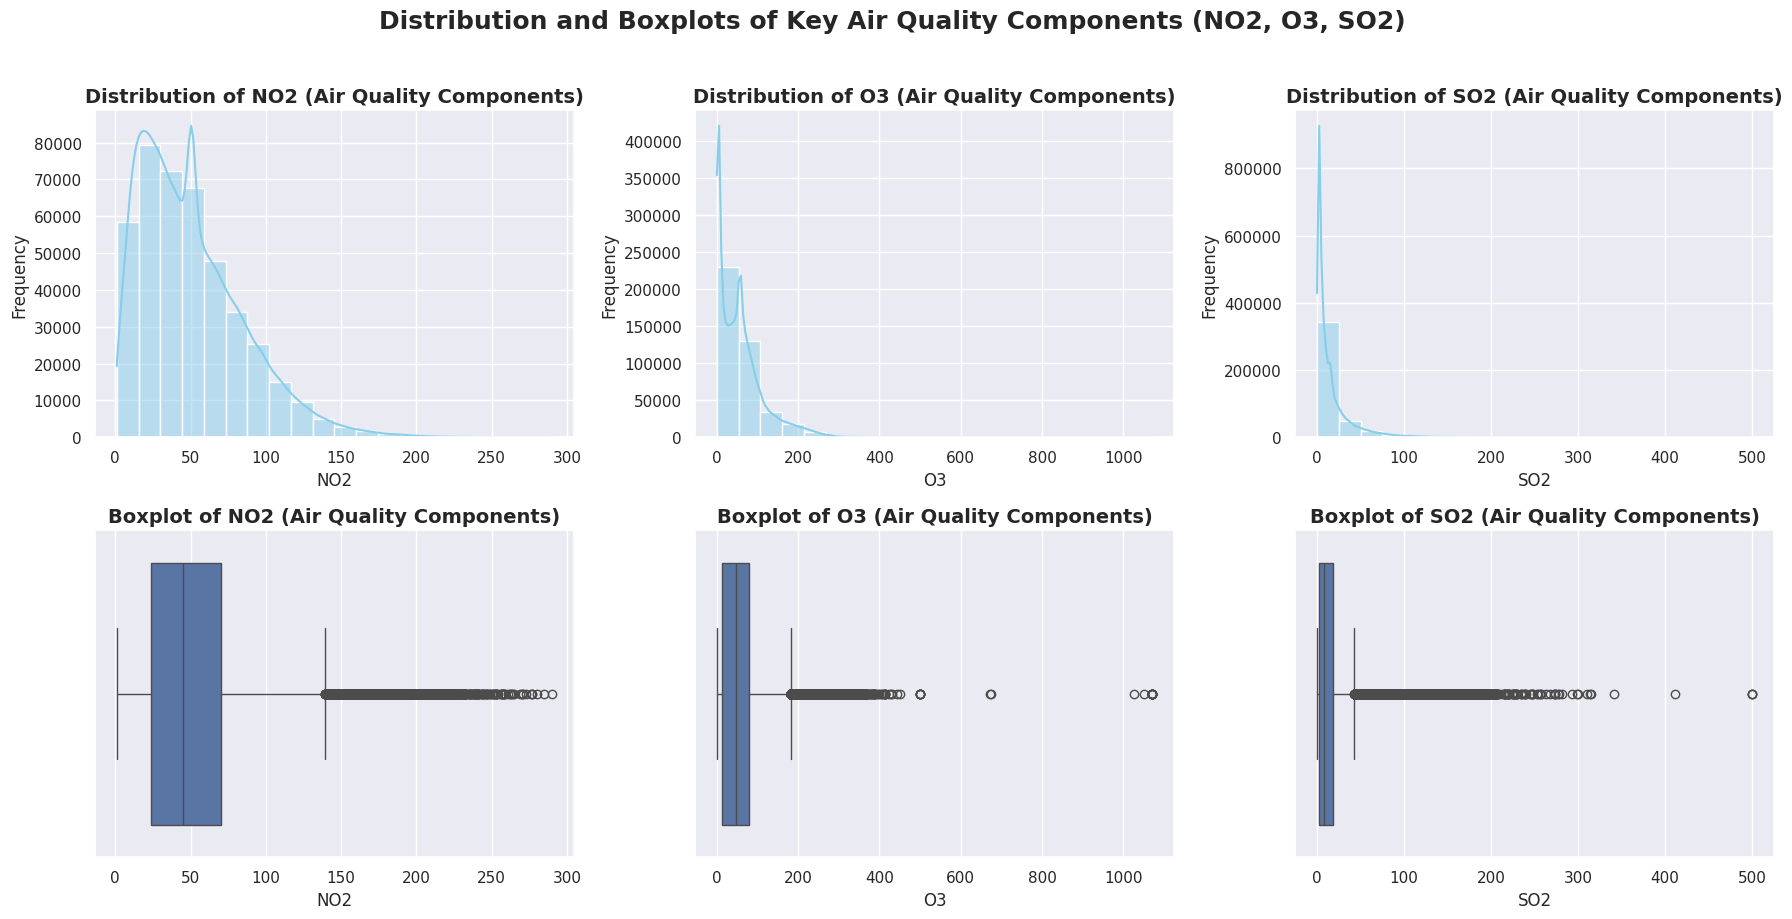

In [33]:
#NO2, O3, SO2
plot_data_distribution(data, category='AIR')


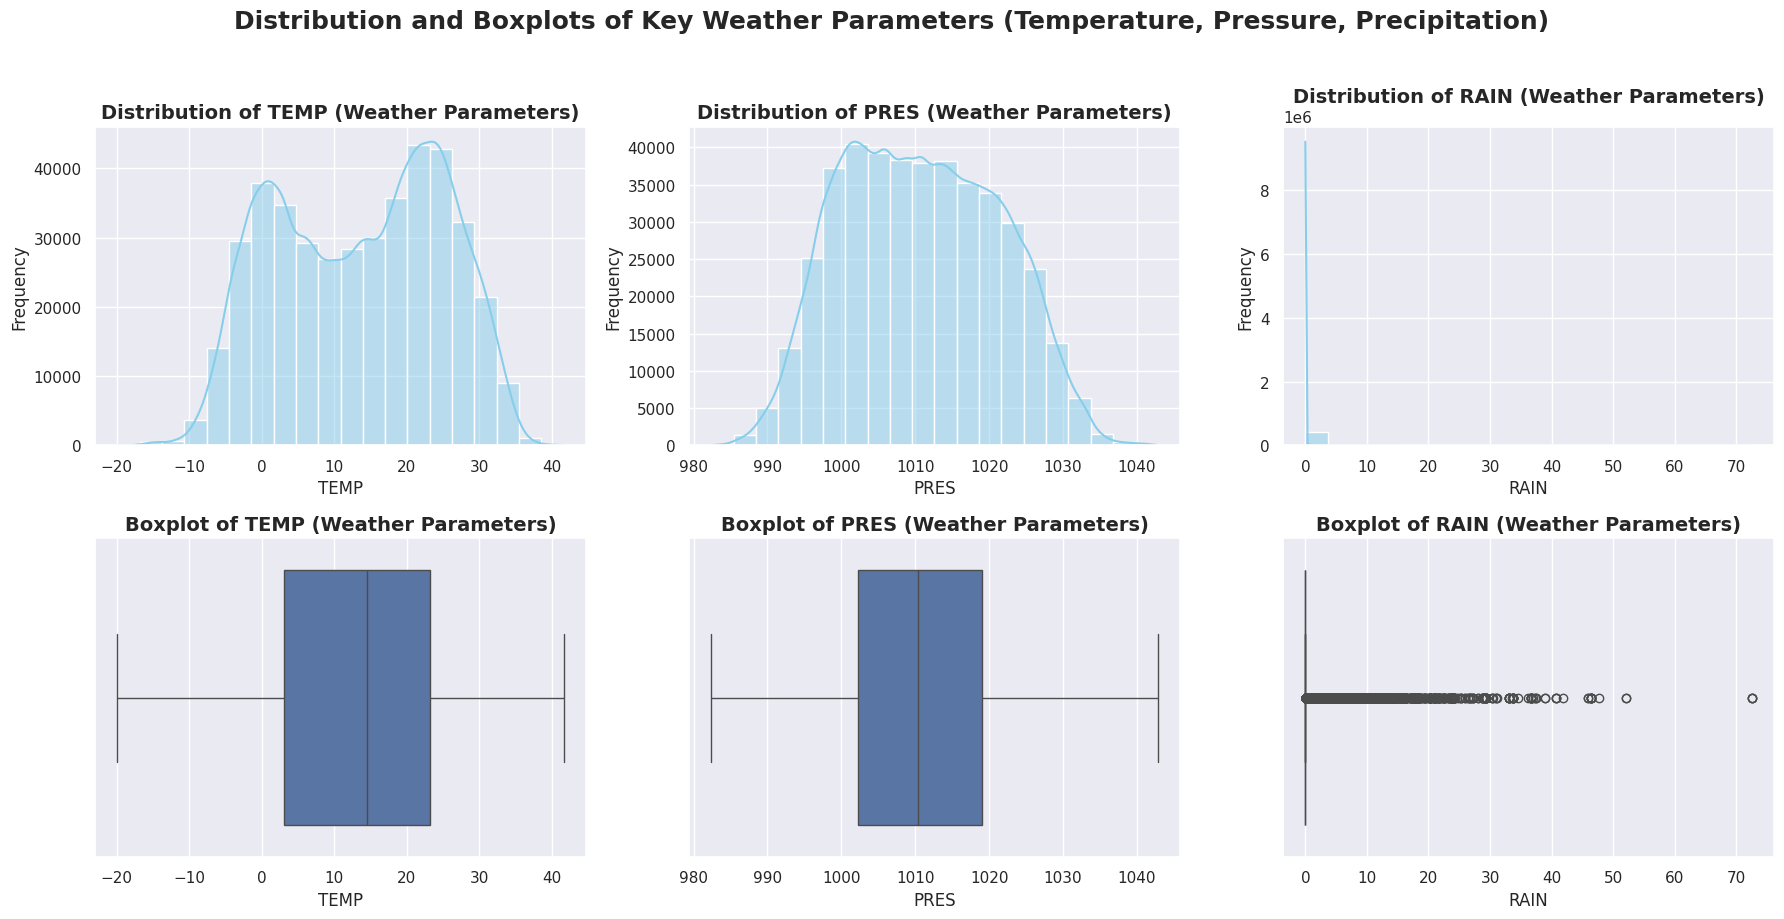

In [34]:
#TEMP, PRES, RAIN)
plot_data_distribution(data, category='WEATHER')


##### Observation
Interms of distribution, the following can be observed for each case;
   - The distribution of temperature likely shows a **bimodal which is also near-normal distribution**. This is becuase of different seasonal variation in Beijing where the peak are the warmer periods. As from the box plot, it can be observed that the distribution is centered around the mean with no outliers. It's mean is aound `14 degrees`
   - The pressure distribution is ** near symmetric**, with small change around a mean value. There are no outlier identified and its mean is around `1010`.
   - The rainfall distribution is very **rightly-skewed**, with most data points showing little or no rainfall and a smaller number of days with heavy rainfall. This hence cause it to show multiple outliers due to large deviation in values.
   - The distribution of NO2 is **right-skewed**, showing higher concentrations during winter months due to traffic and heating, and lower levels during warmer months. It has fewer outliers which might be due to instances of  heavy pollution events.
   - The O3/Ozone distribution has a **rightly skewed**, and has a very large variation hence more outliers.
   - SO2 is **right-skewed**, with a majority of days showing low concentrations, but some outliers indicating pollution spikes, often linked to industrial activities or certain weather conditions.


#### Line Plot for Monthly Trends
- In this case we try to observe the concentration of pollutants like PM2.5, NO2, and O3 change over the months, which helps highlight seasonal trends.

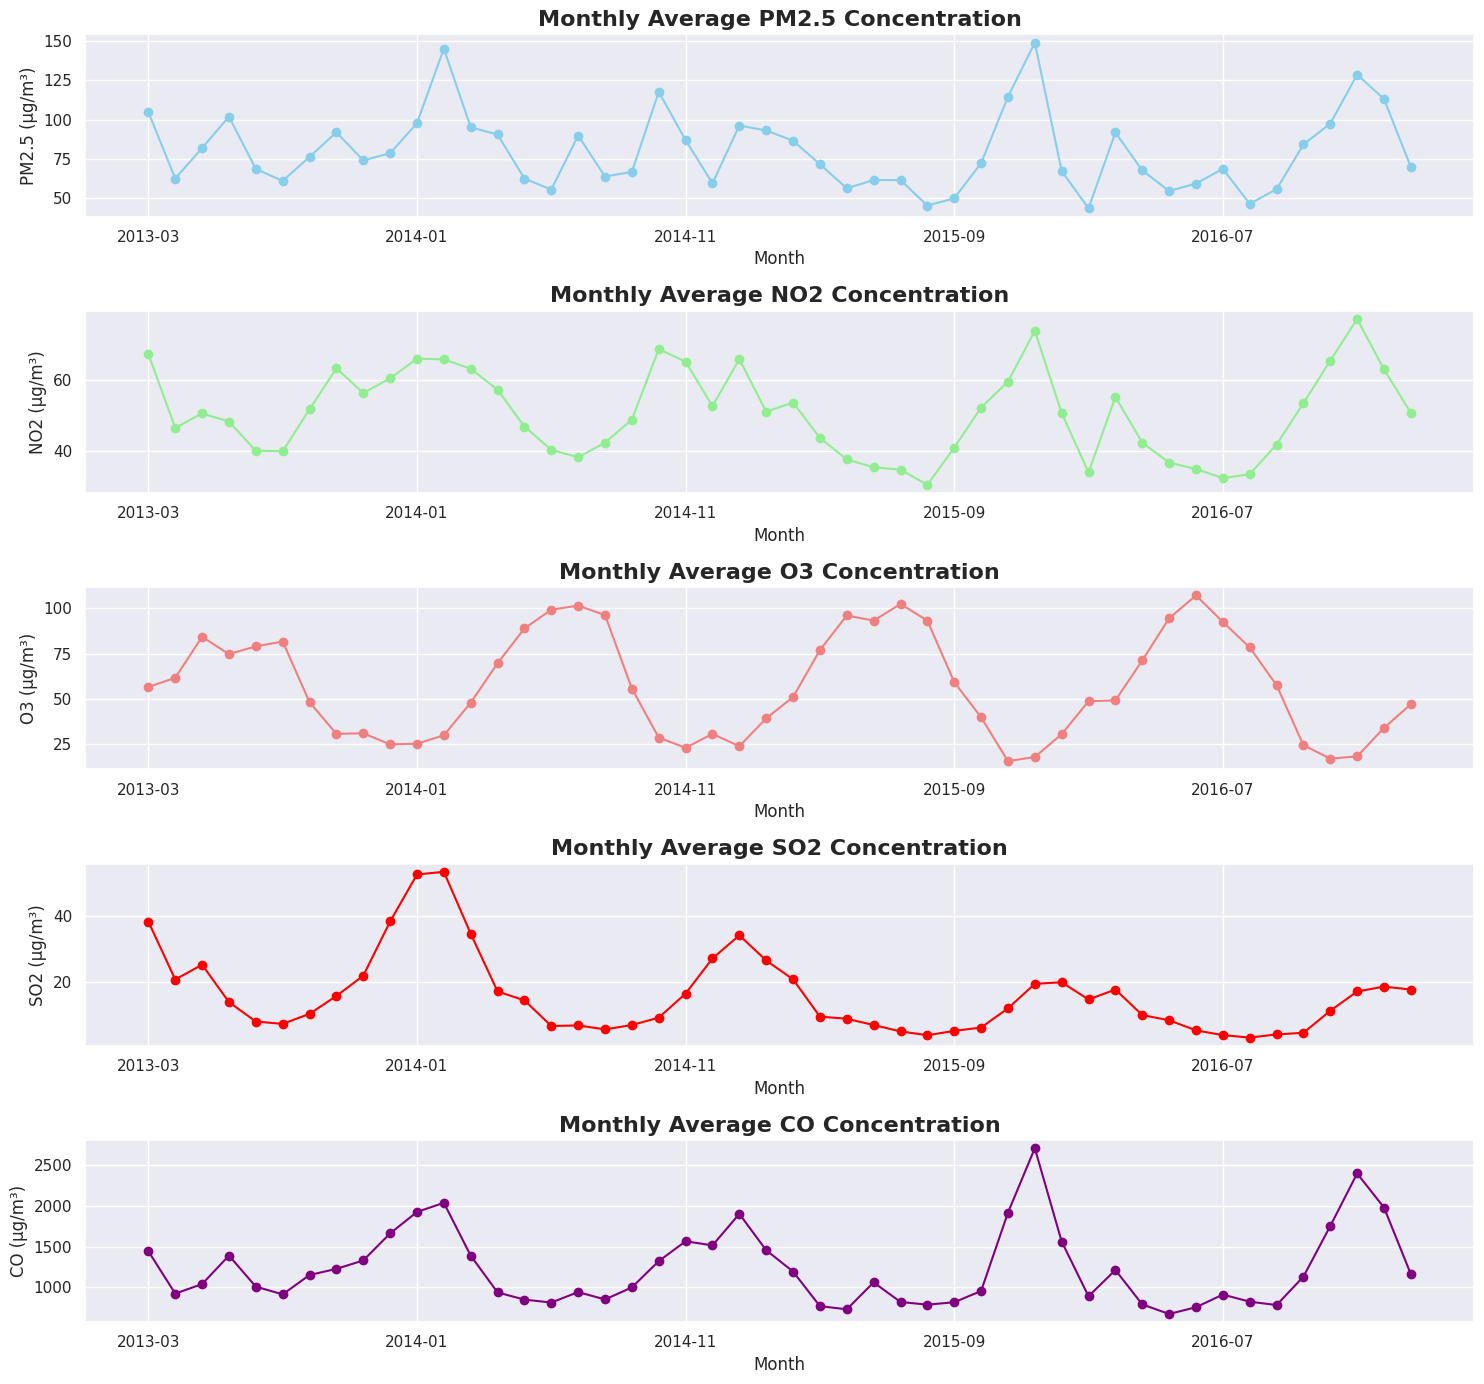

In [35]:
# since we have different years, we can create a variable containing year and month informtion
data['year_month'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)

# lets plot AIR Information: PM2.5, NO2, O3, So2 for monthly trends
plt.figure(figsize=(15, 14))

plt.subplot(5, 1, 1)
monthly_pm25 = data.groupby('year_month')['PM2.5'].mean()
monthly_pm25.plot(kind='line', color='skyblue', marker='o')
plt.title('Monthly Average PM2.5 Concentration', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)

plt.subplot(5, 1, 2)
monthly_no2 = data.groupby('year_month')['NO2'].mean()
monthly_no2.plot(kind='line', color='lightgreen', marker='o')
plt.title('Monthly Average NO2 Concentration', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('NO2 (µg/m³)', fontsize=12)

plt.subplot(5, 1, 3)
monthly_o3 = data.groupby('year_month')['O3'].mean()
monthly_o3.plot(kind='line', color='lightcoral', marker='o')
plt.title('Monthly Average O3 Concentration', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('O3 (µg/m³)', fontsize=12)


plt.subplot(5, 1, 4)
monthly_o3 = data.groupby('year_month')['SO2'].mean()
monthly_o3.plot(kind='line', color='red', marker='o')
plt.title('Monthly Average SO2 Concentration', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('SO2 (µg/m³)', fontsize=12)


plt.subplot(5, 1, 5)
monthly_o3 = data.groupby('year_month')['CO'].mean()
monthly_o3.plot(kind='line', color='purple', marker='o')
plt.title('Monthly Average CO Concentration', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('CO (µg/m³)', fontsize=12)


plt.tight_layout()
plt.show()


##### Observations
- In above graphs, for `PM2.5, SO2 and NO2`, it can be observed that there is an increase in PM2.5, SO2 and NO2 concentrations during winter months (November to February). THe cause might be due to more increased heat emmissions and also vehicles used during the cold weather. This leads to higher pollutant levels in the atmosphere.
- In above, the `Ozone (O3)` shows higher levels in the warmer months (May to August). It seems since O3 is influenced by sunlight, it peaks on warmer months when sunlight and temperatures are higher.
- `CO` is observed to have a similar trend to that of `NO2`
- It can also be observed that when `PM2.5, SO2 and NO2`, we obseve `O3` having low points and vice versa.

##### Line plot and  Boxplot for Hourly Trends
In this case a plot plot is used to show how pollutant levels vary by hour of the day. THis helps to understand any diurnal (daily) patterns, such as higher pollution during rush hours.


In [36]:
colors = ['red','green', 'orange', 'purple', 'yellow', 'blue', 'cyan', 'magenta', 'gray', 'brown']

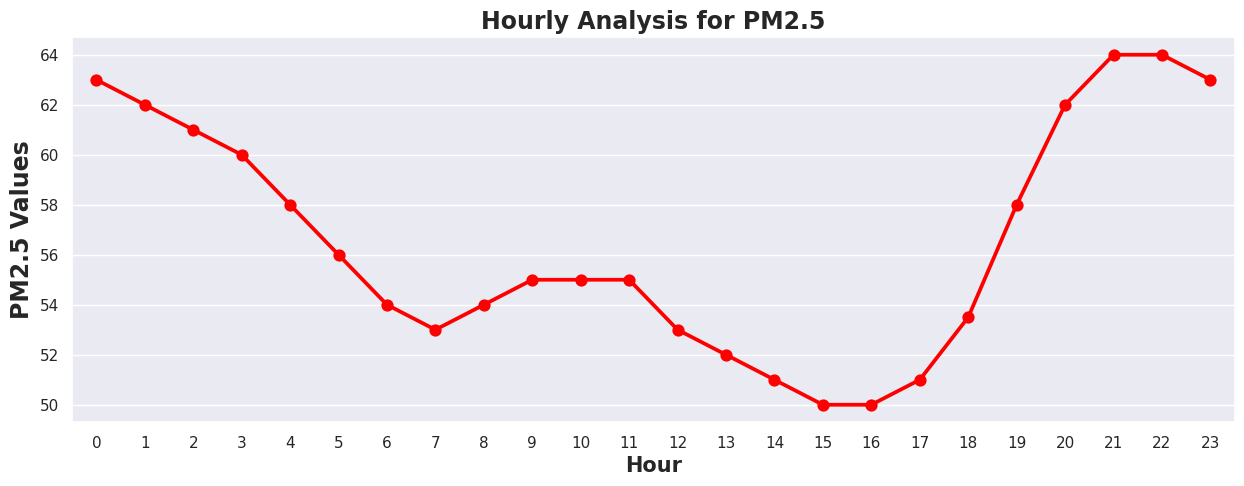

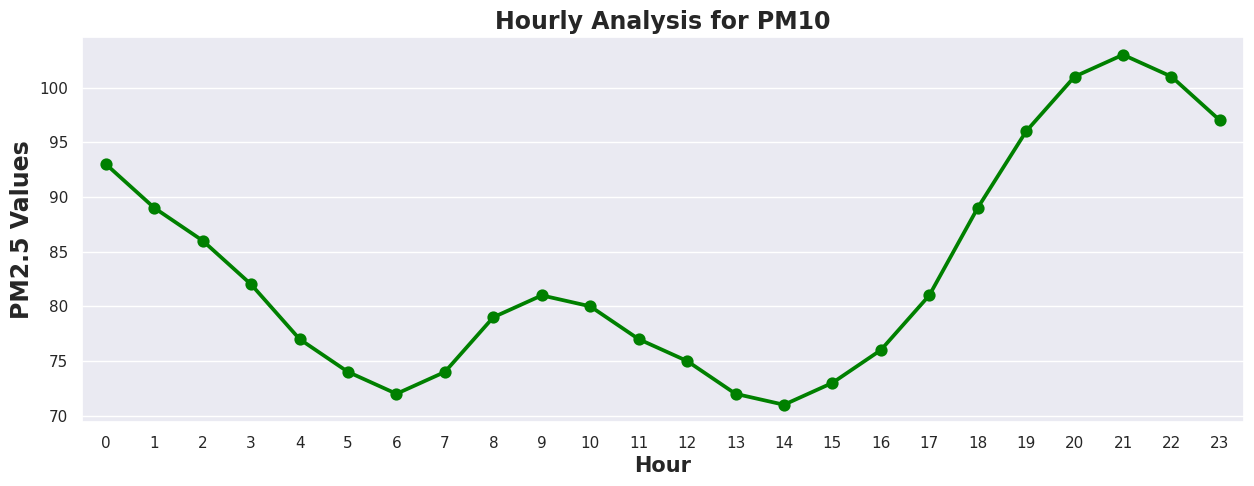

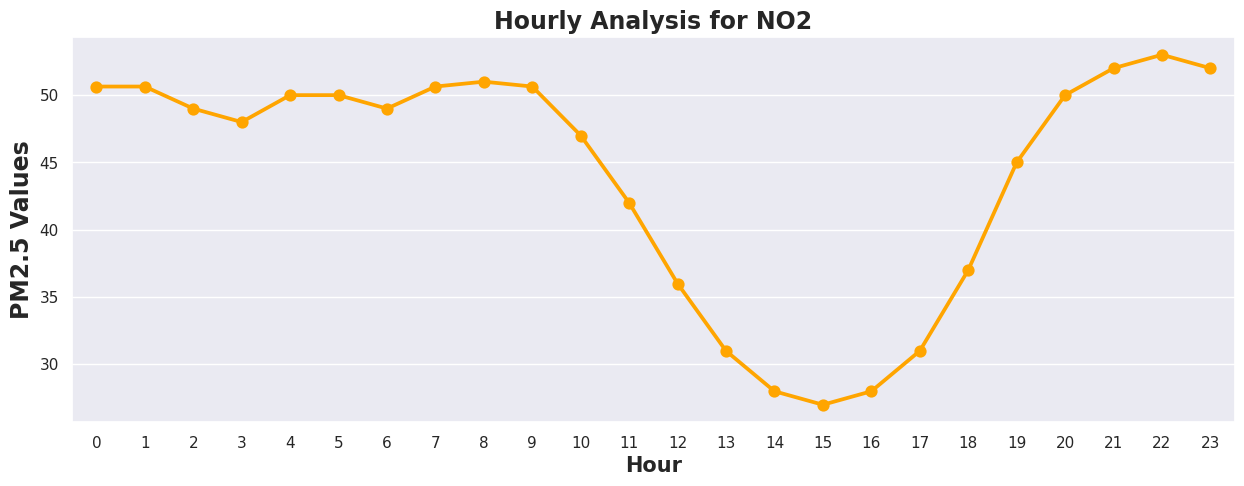

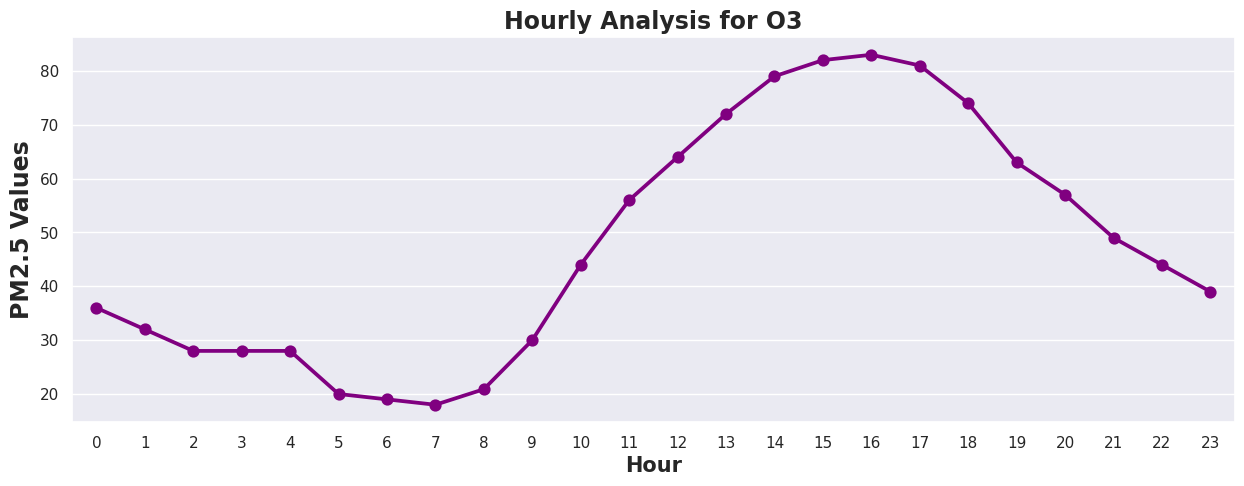

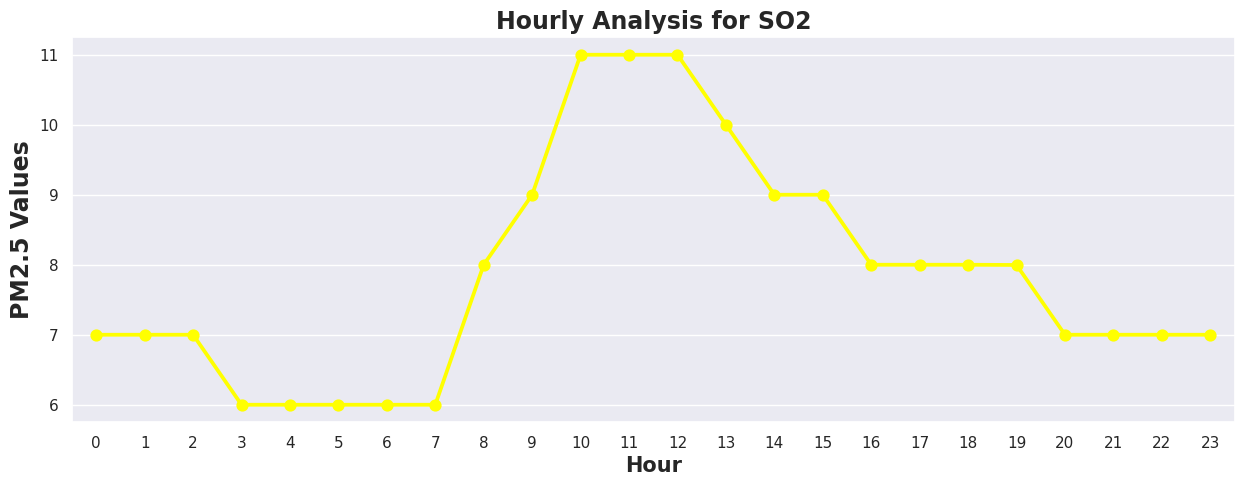

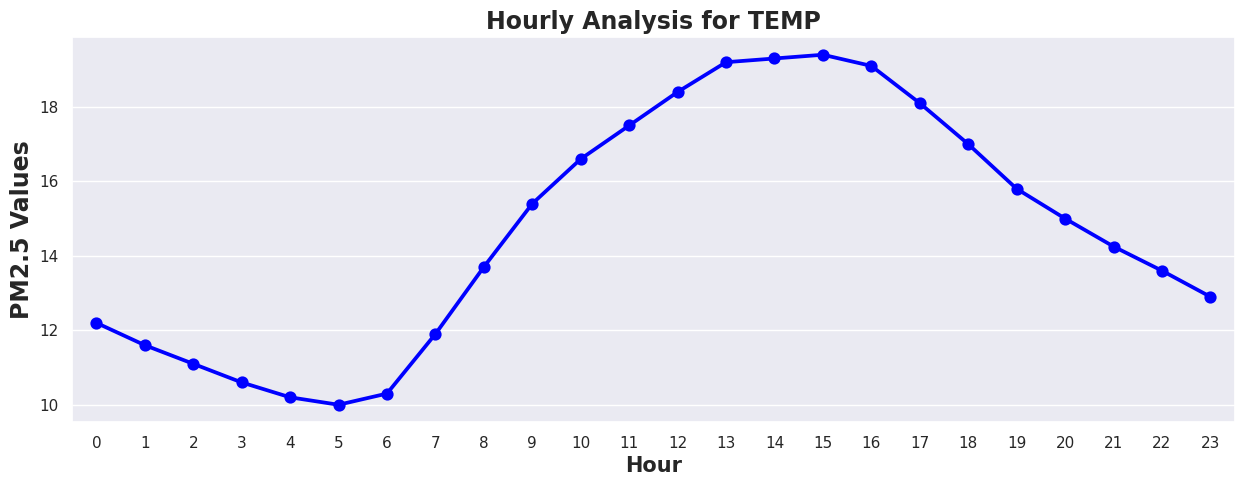

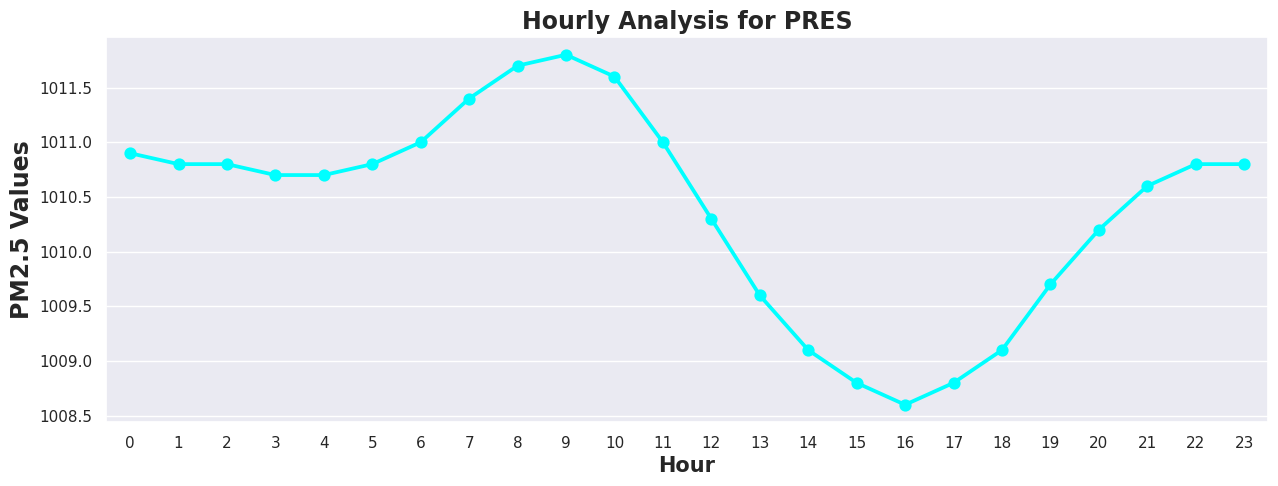

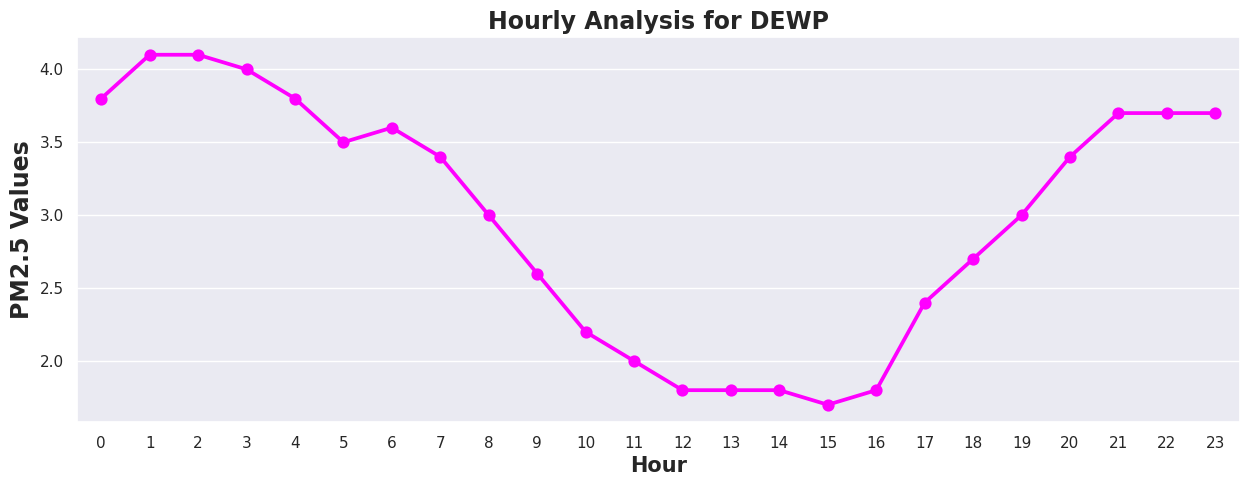

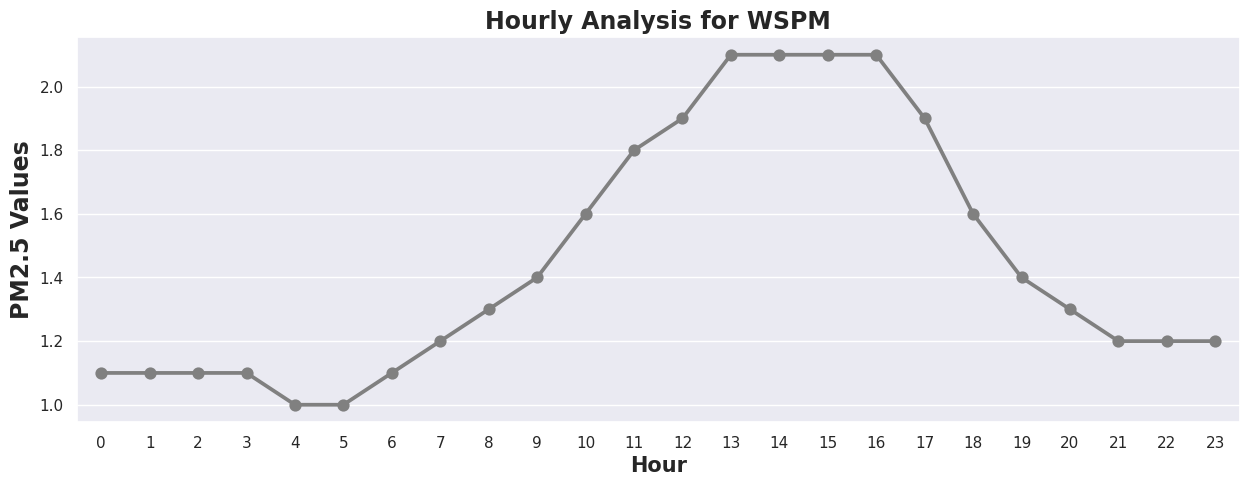

In [37]:
for i, column in enumerate(["PM2.5", "PM10", "NO2", "O3", "SO2", 'TEMP','PRES','DEWP', "WSPM"]):
    data_hr = data[[column,'hour']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='hour', y=str(column), data=data_hr, markers='o', color=colors[i % len(colors)])
    plt.title(f"Hourly Analysis for {column}", fontweight='bold', fontsize=17)
    plt.xlabel("Hour",  fontweight='bold', fontsize=15)
    plt.ylabel("PM2.5 Values", fontweight='bold', fontsize=17)

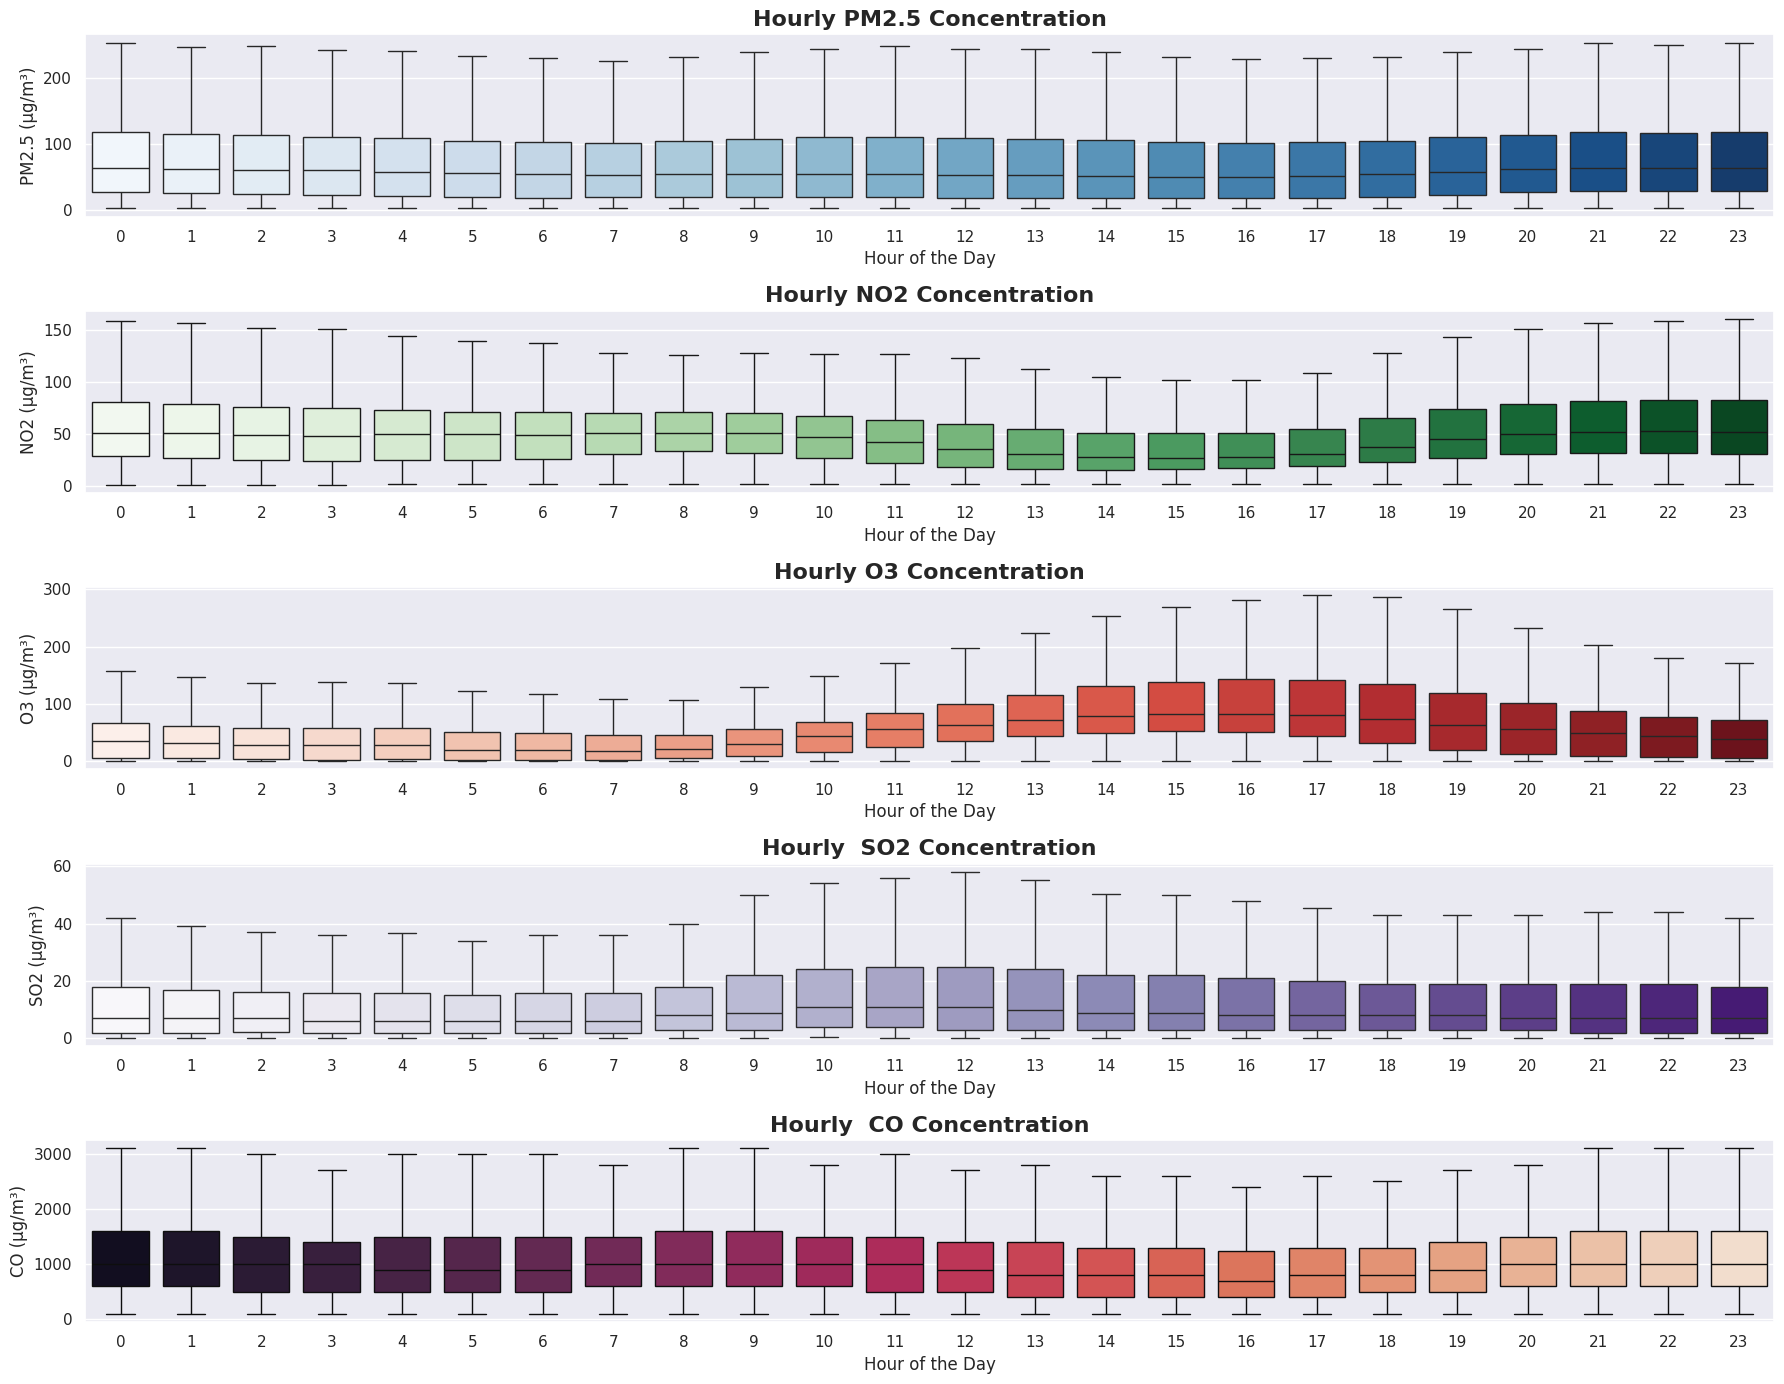

In [38]:
# Plot hourly variation for 5 items accross the whole data
plt.figure(figsize=(18, 14))

plt.subplot(5, 1, 1)
sns.boxplot(x='hour', y='PM2.5', data=data, palette='Blues', showfliers=False)
plt.title('Hourly PM2.5 Concentration', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)

plt.subplot(5, 1, 2)
sns.boxplot(x='hour', y='NO2', data=data, palette='Greens', showfliers=False)
plt.title('Hourly NO2 Concentration', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('NO2 (µg/m³)', fontsize=12)

plt.subplot(5, 1, 3)
sns.boxplot(x='hour', y='O3', data=data, palette='Reds', showfliers=False)
plt.title('Hourly O3 Concentration', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('O3 (µg/m³)', fontsize=12)

plt.subplot(5, 1, 4)
sns.boxplot(x='hour', y='SO2', data=data, palette='Purples', showfliers=False)
plt.title('Hourly  SO2 Concentration', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('SO2 (µg/m³)', fontsize=12)


plt.subplot(5, 1, 5)
sns.boxplot(x='hour', y='CO', data=data, palette='rocket', showfliers=False)
plt.title('Hourly  CO Concentration', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('CO (µg/m³)', fontsize=12)



plt.tight_layout()
plt.show()


###### Observations:
- `PM2.5, CO, and NO2` is observed above that there are some higher pollution levels during peak hours which include 7 AM to 9 AM and 5 PM to 7 PM). This can be associated with increased motor emissions during morning and evening rush hours.
- `SO2` is seen to be up from 7AM upto about 6PM which is normally the normal working days.
- `PM2.5` levels might be high during the early morning and evening when traffic congestion is at its peak.
- `Ozone (O3)` have higher levels between 11AM upto about 7PM  with very high level in the afternoon (1Pm to 6PM). This is likely to be more in sunny day, as ozone forms from reactions between NO2 emissions and sunlight.

### Heatmap for Hourly and Monthly Trends
- In this heatmap is gonna be used to view summary of how pollutant levels (e.g., PM2.5, NO2, O3) vary across both the month and hour of the day. It helps to see if there are patterns influenced by both the time of the day or seasonal factors.

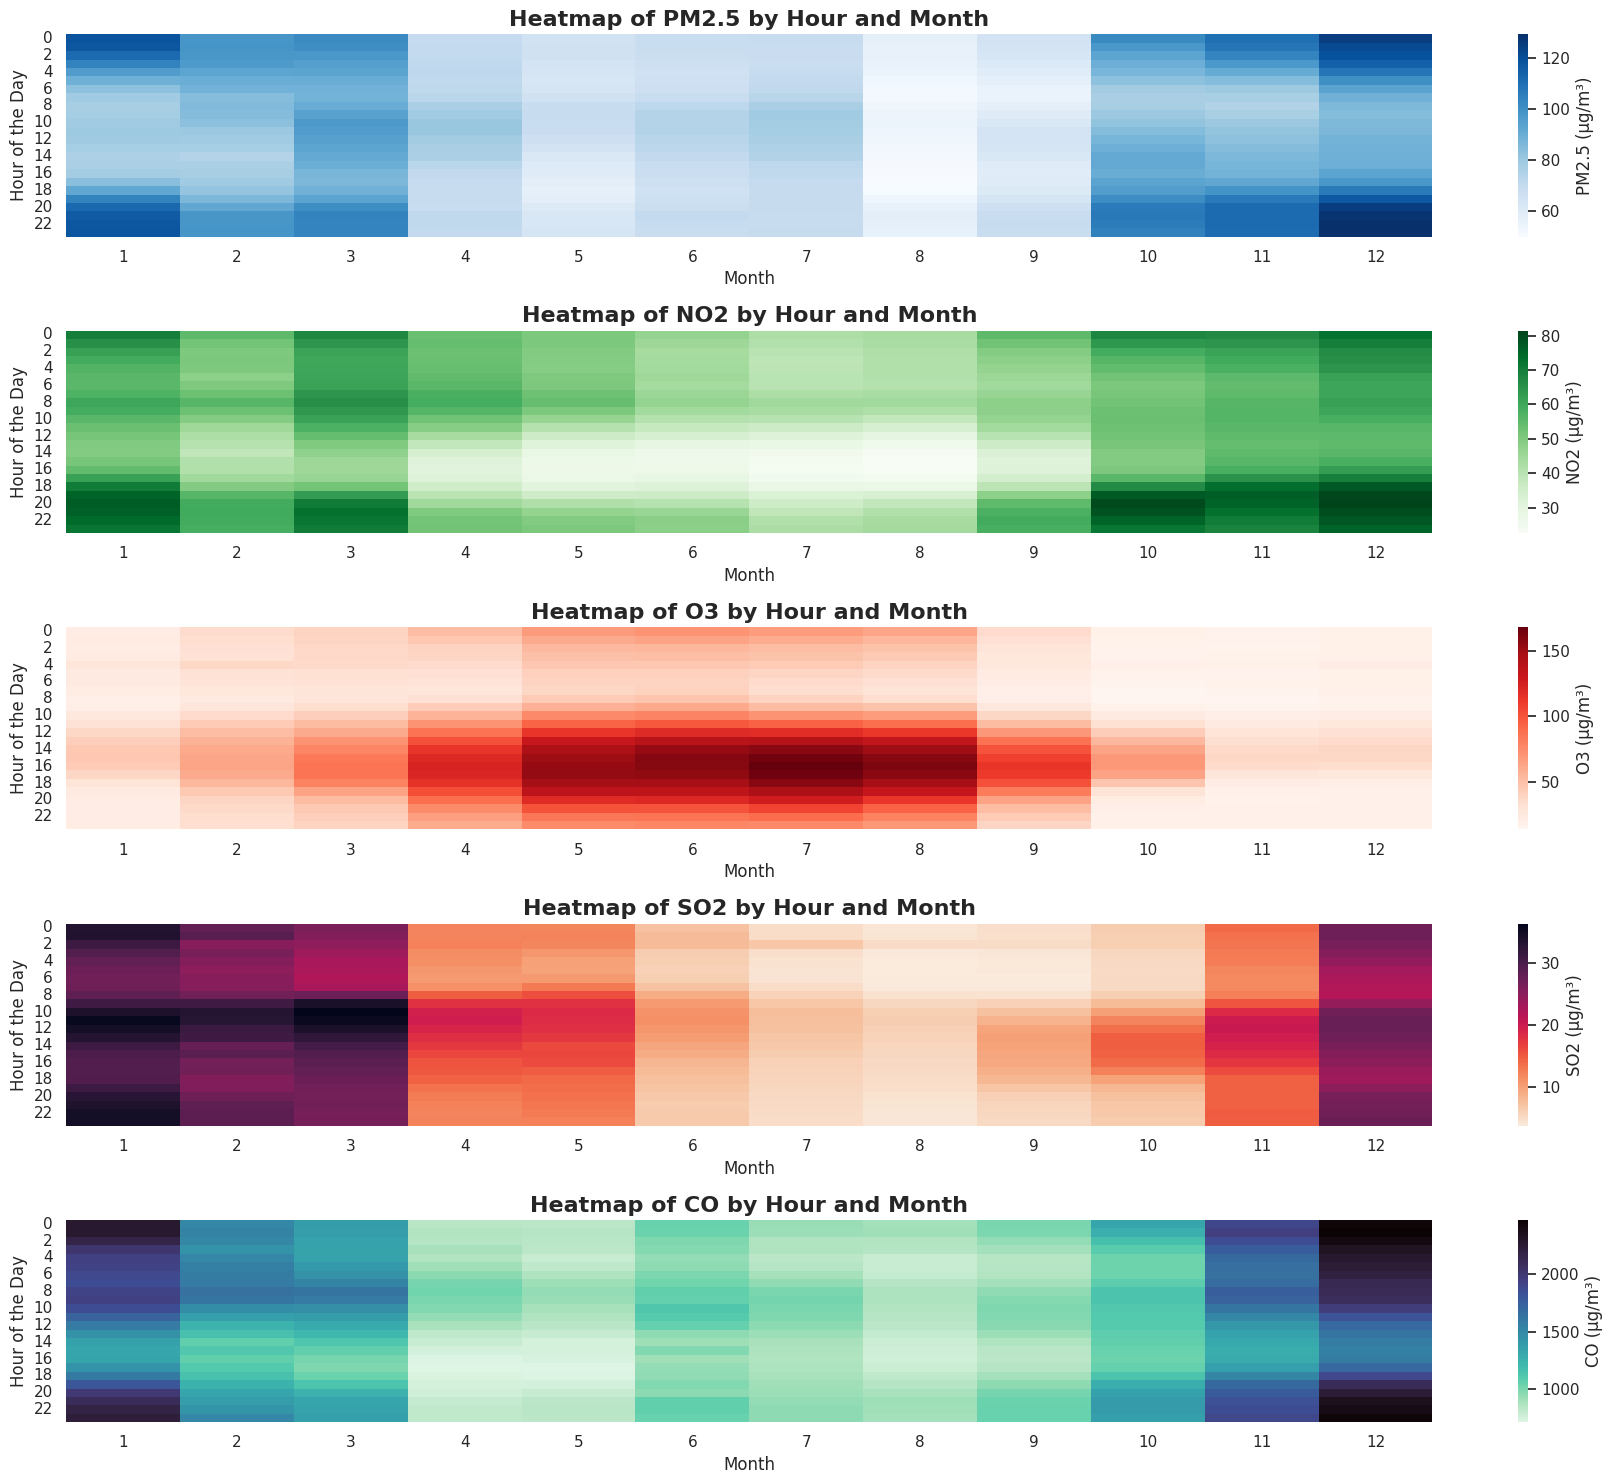

In [39]:

# plot a heatmap for hourly and monthly trends of air quality pollutants.

# create pivottnfor data to get the average pollutant level per month and hour
pm25_pivot = data.pivot_table(values='PM2.5', index='hour', columns='month', aggfunc=np.mean)
no2_pivot = data.pivot_table(values='NO2', index='hour', columns='month', aggfunc=np.mean)
o3_pivot = data.pivot_table(values='O3', index='hour', columns='month', aggfunc=np.mean)
so2_pivot = data.pivot_table(values='SO2', index='hour', columns='month', aggfunc=np.mean)
co_pivot = data.pivot_table(values='CO', index='hour', columns='month', aggfunc=np.mean)


plt.figure(figsize=(18, 15))

plt.subplot(5, 1, 1)
sns.heatmap(pm25_pivot, cmap='Blues', annot=False, cbar_kws={'label': 'PM2.5 (µg/m³)'})
plt.title('Heatmap of PM2.5 by Hour and Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)

plt.subplot(5, 1, 2)
sns.heatmap(no2_pivot, cmap='Greens', annot=False, cbar_kws={'label': 'NO2 (µg/m³)'})
plt.title('Heatmap of NO2 by Hour and Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)

plt.subplot(5, 1, 3)
sns.heatmap(o3_pivot, cmap='Reds', annot=False, cbar_kws={'label': 'O3 (µg/m³)'})
plt.title('Heatmap of O3 by Hour and Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)


plt.subplot(5, 1, 4)
sns.heatmap(so2_pivot, cmap='rocket_r', annot=False, cbar_kws={'label': 'SO2 (µg/m³)'})
plt.title('Heatmap of SO2 by Hour and Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)

plt.subplot(5, 1, 5)
sns.heatmap(co_pivot, cmap='mako_r', annot=False, cbar_kws={'label': 'CO (µg/m³)'})
plt.title('Heatmap of CO by Hour and Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)


plt.tight_layout()
plt.show()



##### Observations
- In above, it is observed that `PM2.5, CO and NO2` Heatmaps shows higher pollutant levels during winter months i.e December, January, and February though also october and novermber and also during peak traffic hours i.e 7-9 AM and 5-7 PM. This is consistent with the increased emissions from heating and vehicles in colder months.
- For `Ozone (O3)`, the levels shows a spike during April to August (which are generally warmer periods) with more concentration between 12Pm to 6Pm. THis might be sun driven with chemical reactions.
- For `SO2`, there is seen to have higher concentration across January, Feb, March and Novermber and DEcember. The trend for SO2 is seen to be like during colder periods, it has higher values. It seems to be inversely related to `O3`






-

- **From above 3 graphs it can be summaried that PM2.5, NO2, CO and SO2 are likely to peak on the colders periods and during rush hours while O3 is likely to peak during high levels in warmer months especially during the midday houses**

##### Temperature (TEMP) vs. Air Quality
- Temperature can influence air pollutants concentrations , especially O3 (ozone), which forms under sunlight and higher temperatures.

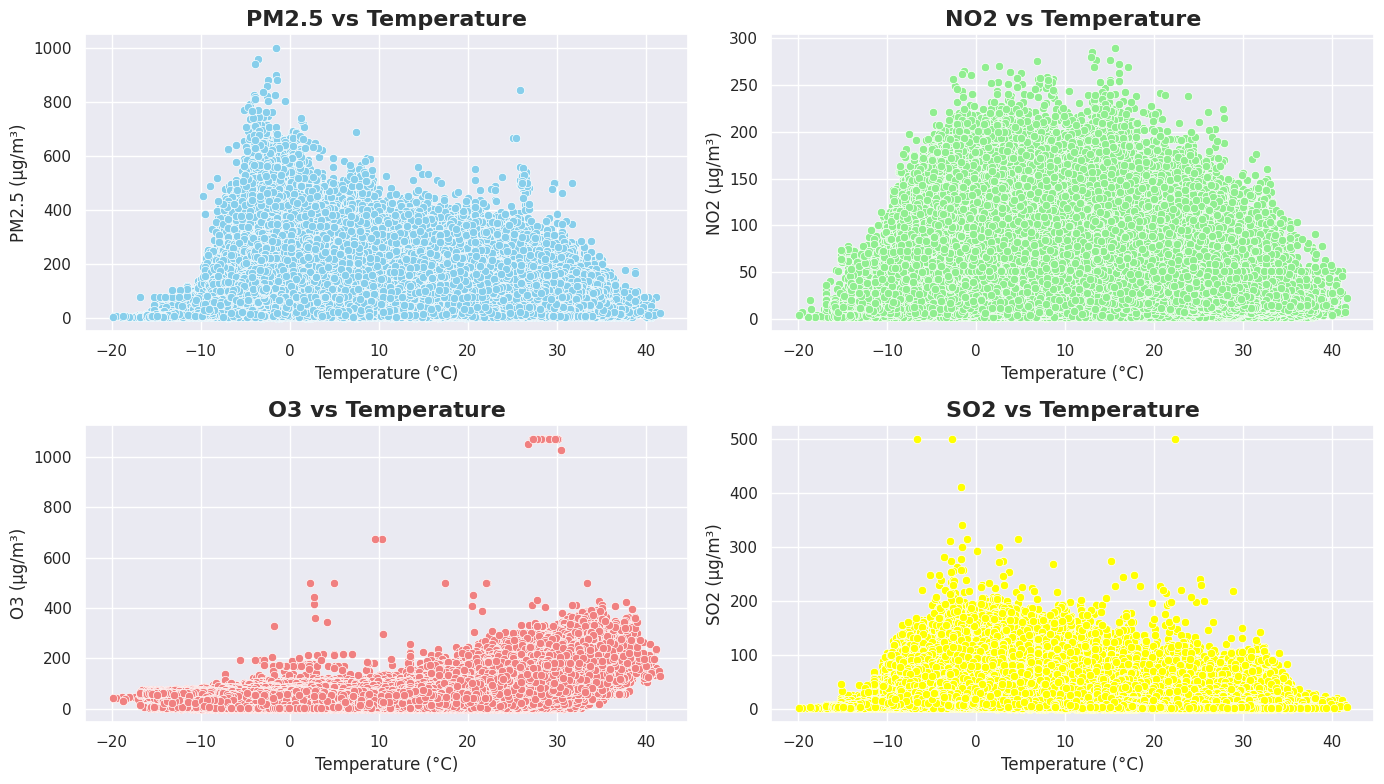

In [40]:
# plot temperature vs. air quality pollutants

plt.figure(figsize=(14, 8))

# Plot PM2.5 vs. Temperature
plt.subplot(2, 2, 1)
sns.scatterplot(x='TEMP', y='PM2.5', data=data, color='skyblue')
plt.title('PM2.5 vs Temperature', fontsize=16, fontweight='bold')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)

# Plot NO2 vs. Temperature
plt.subplot(2, 2, 2)
sns.scatterplot(x='TEMP', y='NO2', data=data, color='lightgreen')
plt.title('NO2 vs Temperature', fontsize=16, fontweight='bold')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('NO2 (µg/m³)', fontsize=12)

# Plot O3 vs. Temperature
plt.subplot(2, 2, 3)
sns.scatterplot(x='TEMP', y='O3', data=data, color='lightcoral')
plt.title('O3 vs Temperature', fontsize=16, fontweight='bold')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('O3 (µg/m³)', fontsize=12)

# Plot SO2 vs. Temperature
plt.subplot(2, 2, 4)
sns.scatterplot(x='TEMP', y='SO2', data=data, color='yellow')
plt.title('SO2 vs Temperature', fontsize=16, fontweight='bold')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('SO2 (µg/m³)', fontsize=12)


plt.tight_layout()
plt.show()


##### Observations:
- For the case of `PM2.5, SO2 and NO2`, the temperature shows no direct correlation since these pollutants are more influenced by  emissions (mostly engines/motor emissions), heating (in colder months), and weather patterns rather than temperature alone.
- For the case of `O3`, it is seen that there appear some positive correlation between O3 and temperature because ozone is a secondary pollutant formed from reactions between NOx emissions and sunlight, which is more intense during warmer temperatures.

### 2. Rainfall (RAIN) vs. Air Quality
Rainfall can directly influence the levels of pollutants, as it can wash pollutants from the atmosphere, reducing concentrations.

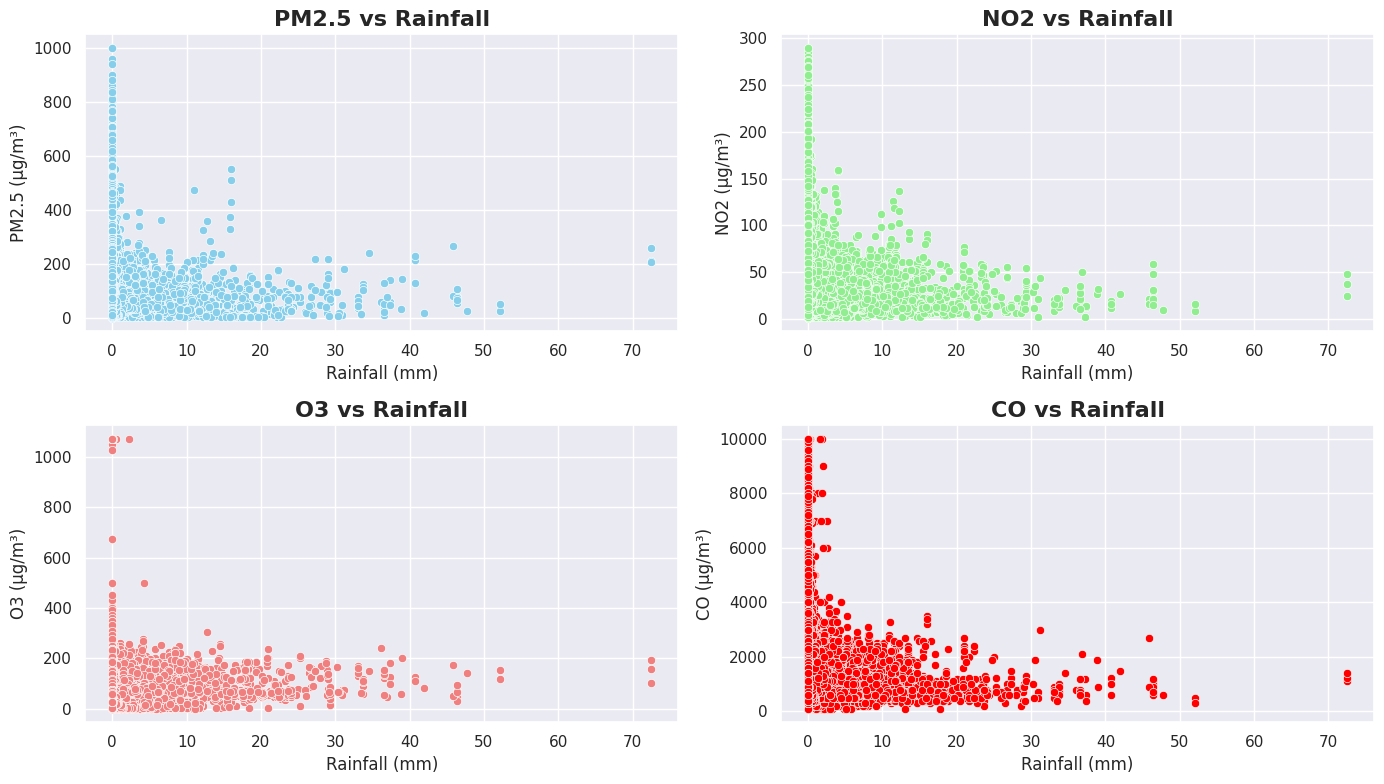

In [41]:
# plot rainfall vs. air quality pollutants

plt.figure(figsize=(14, 8))

# Plot PM2.5 vs. Rainfall
plt.subplot(2, 2, 1)
sns.scatterplot(x='RAIN', y='PM2.5', data=data, color='skyblue')
plt.title('PM2.5 vs Rainfall', fontsize=16, fontweight='bold')
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)

# Plot NO2 vs. Rainfall
plt.subplot(2, 2, 2)
sns.scatterplot(x='RAIN', y='NO2', data=data, color='lightgreen')
plt.title('NO2 vs Rainfall', fontsize=16, fontweight='bold')
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('NO2 (µg/m³)', fontsize=12)

# Plot O3 vs. Rainfall
plt.subplot(2, 2, 3)
sns.scatterplot(x='RAIN', y='O3', data=data, color='lightcoral')
plt.title('O3 vs Rainfall', fontsize=16, fontweight='bold')
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('O3 (µg/m³)', fontsize=12)


# Plot CO vs. Rainfall
plt.subplot(2, 2, 4)
sns.scatterplot(x='RAIN', y='CO', data=data, color='red')
plt.title('CO vs Rainfall', fontsize=16, fontweight='bold')
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('CO (µg/m³)', fontsize=12)

plt.tight_layout()
plt.show()


##### Observations:
- It is observed that there is a negative correlation between rainfall and `PM2.5, CO and NO2.`. THe rain can wash pollutants from the atmosphere, resulting in lower concentrations during or after rainfall.
- Also the same thing is observed on `O3` as it has a negative correlation with rainfall. THis is becuase the rain helps clear ozone (O3) from the atmosphere.

##### Wind Speed (WSPM) and Direction (wd) vs. Air Quality
Wind speed and direction are crucial in understanding how pollutants disperse or accumulate. Higher wind speeds disperse pollutants, while lower wind speeds might result in pollutant accumulation.

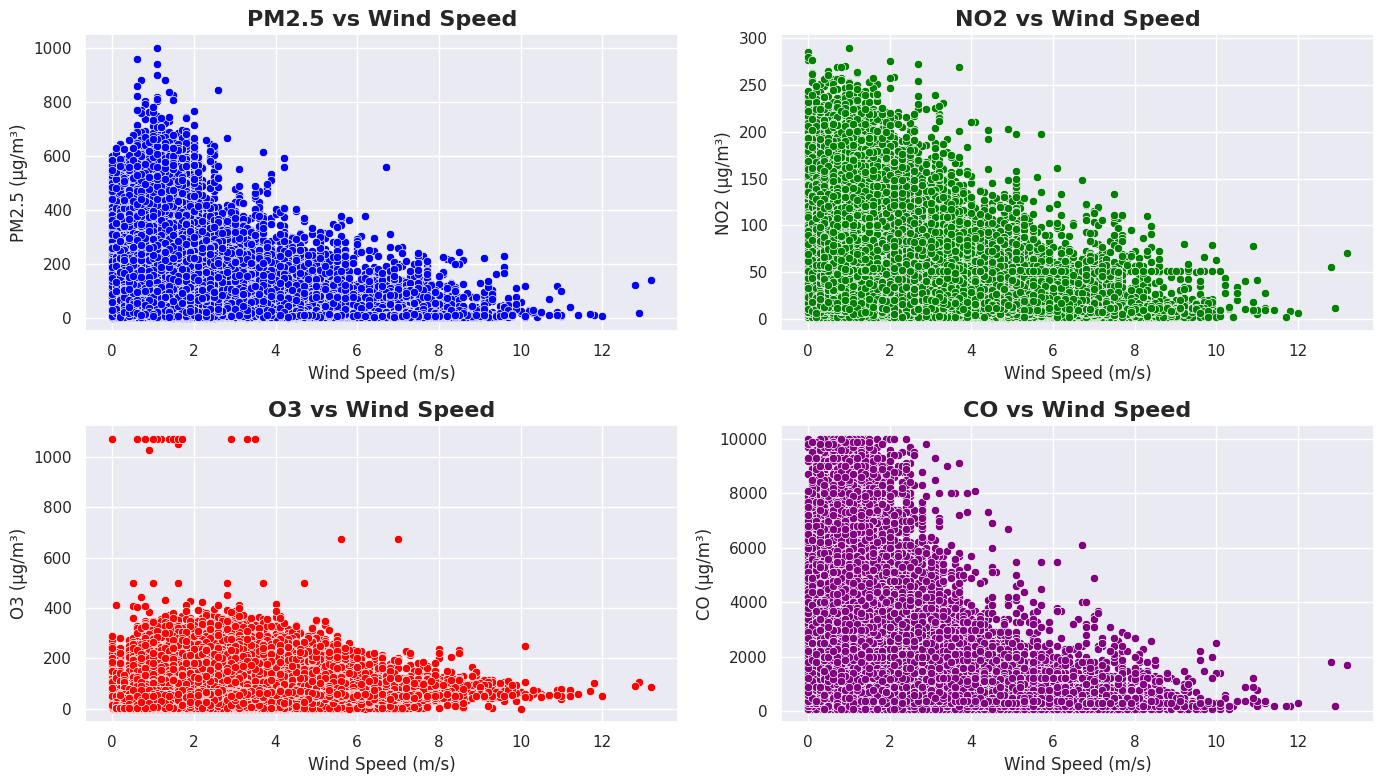

In [42]:
# plot wind speed vs. air quality pollutants.

plt.figure(figsize=(14, 8))

# Plot PM2.5 vs. Wind Speed
plt.subplot(2, 2, 1)
sns.scatterplot(x='WSPM', y='PM2.5', data=data, color='blue')
plt.title('PM2.5 vs Wind Speed', fontsize=16, fontweight='bold')
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)

# Plot NO2 vs. Wind Speed
plt.subplot(2, 2, 2)
sns.scatterplot(x='WSPM', y='NO2', data=data, color='green')
plt.title('NO2 vs Wind Speed', fontsize=16, fontweight='bold')
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('NO2 (µg/m³)', fontsize=12)

# Plot O3 vs. Wind Speed
plt.subplot(2, 2, 3)
sns.scatterplot(x='WSPM', y='O3', data=data, color='red')
plt.title('O3 vs Wind Speed', fontsize=16, fontweight='bold')
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('O3 (µg/m³)', fontsize=12)

# Plot CO vs. Wind Speed
plt.subplot(2, 2, 4)
sns.scatterplot(x='WSPM', y='CO', data=data, color='purple')
plt.title('CO vs Wind Speed', fontsize=16, fontweight='bold')
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('CO (µg/m³)', fontsize=12)

plt.tight_layout()
plt.show()


##### Observation
- It is observed that higher wind speeds have a negative correlation with polutants. THis is because wind might help disperse the polutant away. For `O3`, the correlation is very small.
- 

##### DEw Point vs. Air Quality

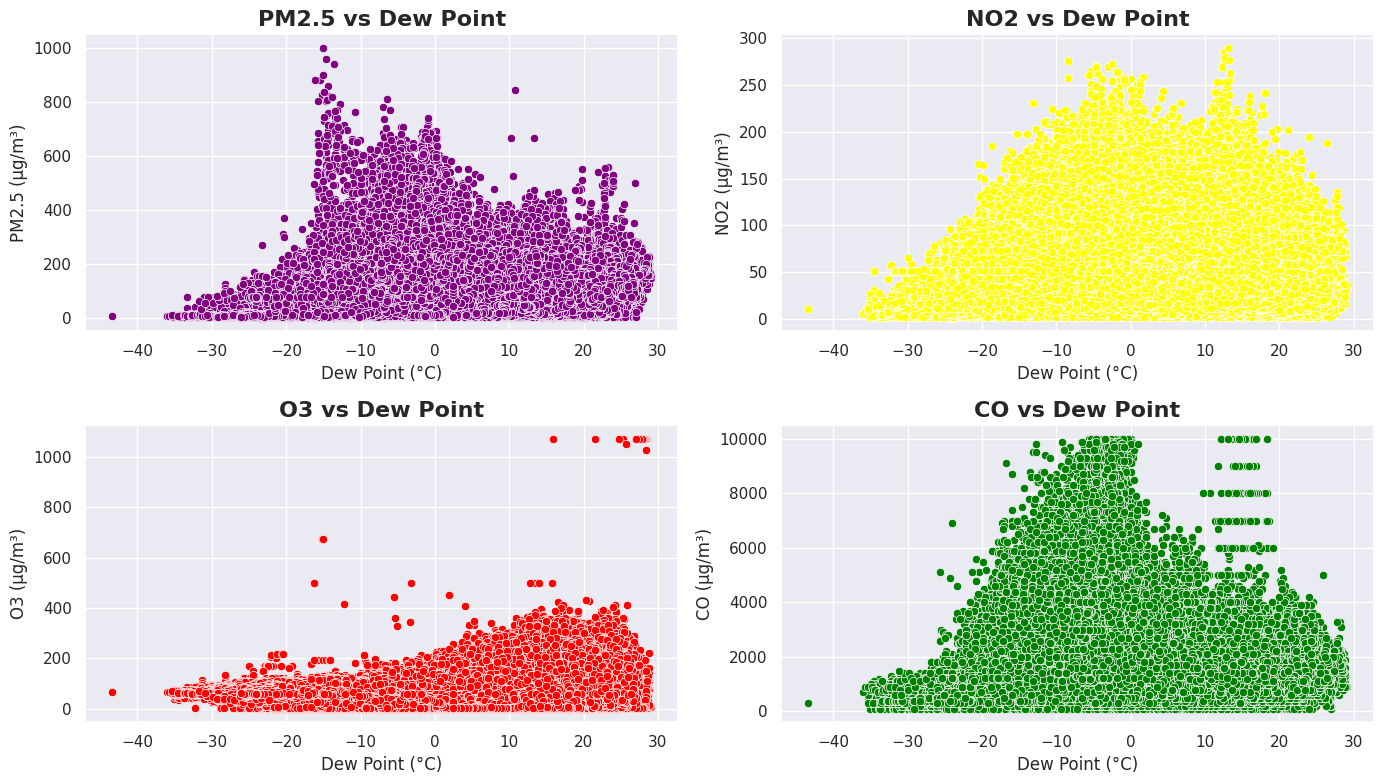

In [43]:
# plot dew point vs. air quality pollutants.
    

plt.figure(figsize=(14, 8))

# Plot PM2.5 vs. Dew Point
plt.subplot(2, 2, 1)
sns.scatterplot(x='DEWP', y='PM2.5', data=data, color='purple')
plt.title('PM2.5 vs Dew Point', fontsize=16, fontweight='bold')
plt.xlabel('Dew Point (°C)', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)

# Plot NO2 vs. Dew Point
plt.subplot(2, 2, 2)
sns.scatterplot(x='DEWP', y='NO2', data=data, color='yellow')
plt.title('NO2 vs Dew Point', fontsize=16, fontweight='bold')
plt.xlabel('Dew Point (°C)', fontsize=12)
plt.ylabel('NO2 (µg/m³)', fontsize=12)

# Plot O3 vs. Dew Point
plt.subplot(2, 2, 3)
sns.scatterplot(x='DEWP', y='O3', data=data, color='red')
plt.title('O3 vs Dew Point', fontsize=16, fontweight='bold')
plt.xlabel('Dew Point (°C)', fontsize=12)
plt.ylabel('O3 (µg/m³)', fontsize=12)

# Plot CO vs. Dew Point
plt.subplot(2, 2, 4)
sns.scatterplot(x='DEWP', y='CO', data=data, color='green')
plt.title('CO vs Dew Point', fontsize=16, fontweight='bold')
plt.xlabel('Dew Point (°C)', fontsize=12)
plt.ylabel('CO (µg/m³)', fontsize=12)

plt.tight_layout()
plt.show()


##### Observation
- The scatter plot  for `Pm2.5` shows a **weak correlation** between PM2.5 levels and dew point. We expect more dew points in colder times hence higher PM2.5 might coincide with higher humidity though the relationship is not strong.
- For the case of `NO2`, it has some **moderate correlation** between NO2 and dew point. High dew points may trap NO2 closer to the ground, increasing pollution.
- The scatter plot for Ozone (O3) is shows a **strong positive correlation** with dew point, especially during the summer months. Ozone forms in warm, sunny conditions, and higher dew points indicate high humidity, which can increases ozone formation.
- The relationship between CO and dew point may be **weak or non-linear**. CO is primarily linked to combustion processes while higher humidity can affect air quality, it’s not as directly tied to CO levels as it is for other pollutants like O3.


#### Correlation Analysis on Numerical columns

In [44]:
# select numerical columns
# We exlude the TIME BASED VARIABLES 
df_num = df.select_dtypes(include=["float", "int"]).drop(columns=["year", "month", "day", "hour"])
df_num.head(3)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,9.0,9.0,3.000000,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,5.7
1,4.0,4.0,3.000000,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,3.9
2,7.0,7.0,15.830835,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,5.3


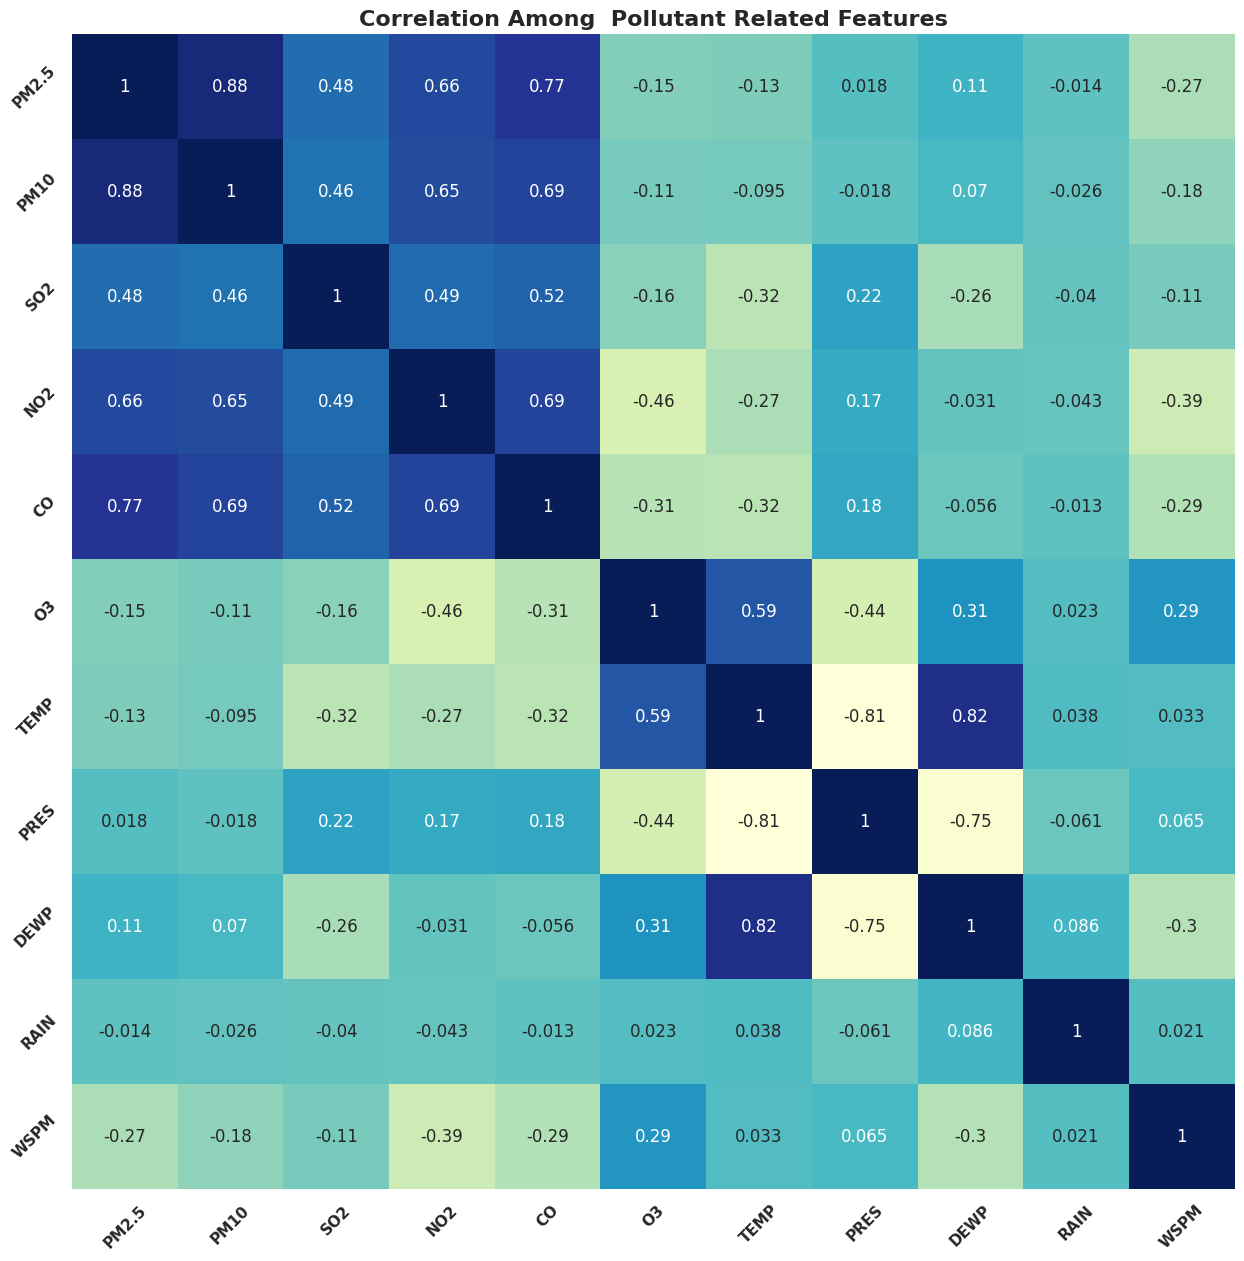

In [45]:
# plot corrrelation analysis
plt.figure(figsize=(15,15))
corr = df_num.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Correlation Among  Pollutant Related Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(rotation=45, fontweight='bold')
plt.show()

##### Observation from correlation analysis
- **PM2.5 and PM10** are strongly correlated, and their levels are linked with common sources of pollution, such as industrial emissions and vehicular traffic.
- **CO**, **NO2**, and **SO2** tend to increase together, reflecting emissions from combustion processes.
- **Ozone** (O3) behaves differently, showing negative correlations with most primary pollutants, especially **NO2**.
- **Temperature** and **dew point** have a strong relationship, and both can influence pollutant behavior, with higher temperatures generally leading to lower concentrations of particulate matter.
- **Rainfall** and **wind speed** show weak to moderate impacts on air quality, with wind likely dispersing pollutants and rainfall having a temporary cleansing effect.

### TOp correlations with `PM2.5`

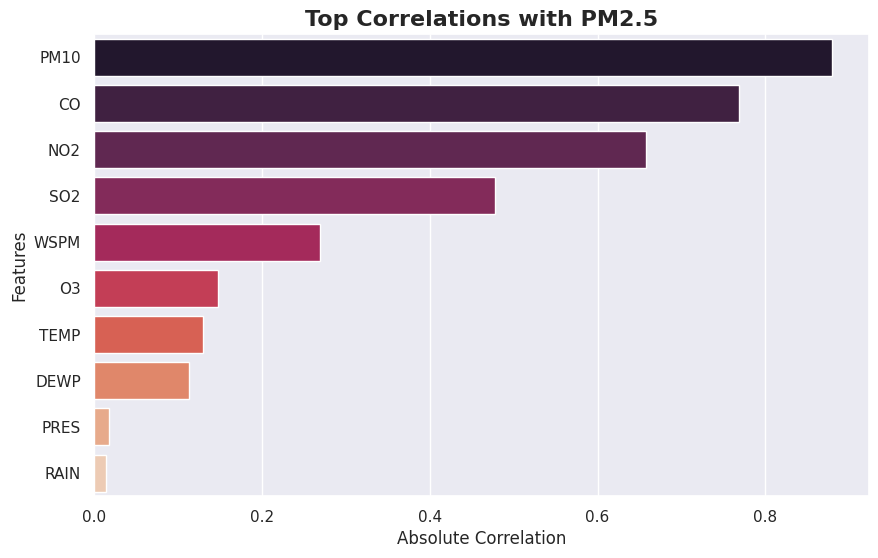

In [46]:
# get correlation with PM2.5

# extract the PM2.5 column and sort the correlations
pm25_corr = corr['PM2.5'].abs().sort_values(ascending=False)
# remove the first since is stroke itself
top_corr = pm25_corr.index[1:]  

# a bar chart show the results
plt.figure(figsize=(10, 6))
sns.barplot(x=pm25_corr[top_corr], y=top_corr, palette='rocket')
plt.title('Top Correlations with PM2.5', fontsize=16, fontweight='bold')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')

plt.show()

#### Observation
- PM2.5 shows **strong positive correlations** with **PM10 (0.88)**, **CO (0.77)**, and **NO2 (0.66)** which indicates that these pollutants often rise together, likely due to shared sources like traffic and industrial emissions.
- It has **moderate correlation** with **SO2 (0.48)**,
- The correlation with **wind speed (0.27)** is weak, suggesting that wind has a limited effect on PM2.5 concentrations.
- There’s a **weak positive correlation** with **O3 (0.15)**, likely due to overlapping conditions affecting both pollutants, and a very weak correlation with **temperature (0.13)**, indicating that temperature has little direct impact on PM2.5 levels.
- The correlations with **dew point (0.11)**, **pressure (0.02)**, and **rain (0.01)** are very weak, showing minimal influence on PM2.5 concentrations.

## Task 3: Model Building for Air Quality Prediction
- This task will involve building a machine learning model to predict air quality focusing on pollutant levels such as **PM2.5**, **NO2**, or **O3**, based on various environmental and meteorological features (e.g., temperature, pressure, wind speed, etc.). The process includes:
    1. **Data Preprocessing**: Clean and transform the data for model input.
    2. **Feature Selection**: Identify relevant features for the model.
    3. **Model Selection**: Choose an appropriate machine learning algorithm.
    4. **Model Evaluation**: Evaluate the model's performance using appropriate metrics.



- Below are the models which are going to be used with basic regression models used as baseline model;
    - **Linear Regression**
    - **Random Forest Regressor**
    - **XGBoost**
    - **Gradient Boosting Regressor**
 
- THe models will be evaluated using the following measures;
    - **Mean Absolute Error (MAE)**
    - **Mean Squared Error (MSE)**
    - **Root Mean Squared Error (RMSE)**
    - **R² (coefficient of determination)**

In [47]:
# recheck the data
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,2013,3,1,0,9.0,9.0,3.000000,17.000000,300.000000,89.000000,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,2013-03-01
1,2013,3,1,1,4.0,4.0,3.000000,16.000000,300.000000,88.000000,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,2013-03-01
2,2013,3,1,2,7.0,7.0,15.830835,17.000000,300.000000,60.000000,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,2013-03-01
3,2013,3,1,3,3.0,3.0,5.000000,18.000000,1230.766454,57.372271,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,2013-03-01
4,2013,3,1,4,3.0,3.0,7.000000,50.638586,200.000000,84.000000,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,2013-03-01


In [48]:
# encode categorical variables like 'station', 'wd' using LabelEncoder

# we have encoder for each one of them since we need to reuse for predictions
encoder_station = LabelEncoder()
encoder_wd = LabelEncoder()
df['station'] = encoder_station.fit_transform(df['station'])
df['wd'] = encoder_wd.fit_transform(df['wd'])


In [49]:
df.head(3)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,2013,3,1,0,9.0,9.0,3.000000,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,6,5.7,3,2013-03-01
1,2013,3,1,1,4.0,4.0,3.000000,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,7,3.9,3,2013-03-01
2,2013,3,1,2,7.0,7.0,15.830835,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,6,5.3,3,2013-03-01


In [50]:
df.shape

(420768, 18)

In [51]:
# take a sample of data due to computation issues
df_sample = df.drop("datetime",axis=1).sample(frac=0.25, random_state=2024)

In [52]:
# Feature selection - we will predict PM2.5
X = df_sample.drop(columns=['PM2.5'])  
Y = df_sample['PM2.5'] 

In [53]:
# Split the data into training and test sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=42)

Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((84153, 16), (21039, 16), (84153,), (21039,))

In [54]:
# feature scaling (Standardization)
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [55]:
# create model objects
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

In [56]:
# train these models 
results = {}
for model_name, model in models.items():
    model.fit(Xtrain_scaled, Ytrain)
    Ypred = model.predict(Xtest_scaled)
    
    mae = mean_absolute_error(Ytest, Ypred)
    mse = mean_squared_error(Ytest, Ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Ytest, Ypred)
    
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

In [57]:
# show the perfomance results
perfomance_res = pd.DataFrame(results).T
perfomance_res

,MAE,MSE,RMSE,R2
Linear Regression,20.480904,1015.189326,31.862036,0.842020
Random Forest,12.355447,403.246372,20.080995,0.937248
Gradient Boosting,15.682178,604.439663,24.585355,0.905939
XGBoost,12.042182,365.903338,19.128600,0.943059


#### Residual Plots
- Residuals plots shows the differences between the actual and predicted values in a model.
- It helps in evaluating model performance and identify how well the model fits the data and whether any patterns remain unexplained. - - In a perfect case, residuals should be randomly distributed around zero, indicating that the model has captured the underlying relationships in the data. They wills provide insight into where the model is making errors, helping us refine and improve the model for better predictions.

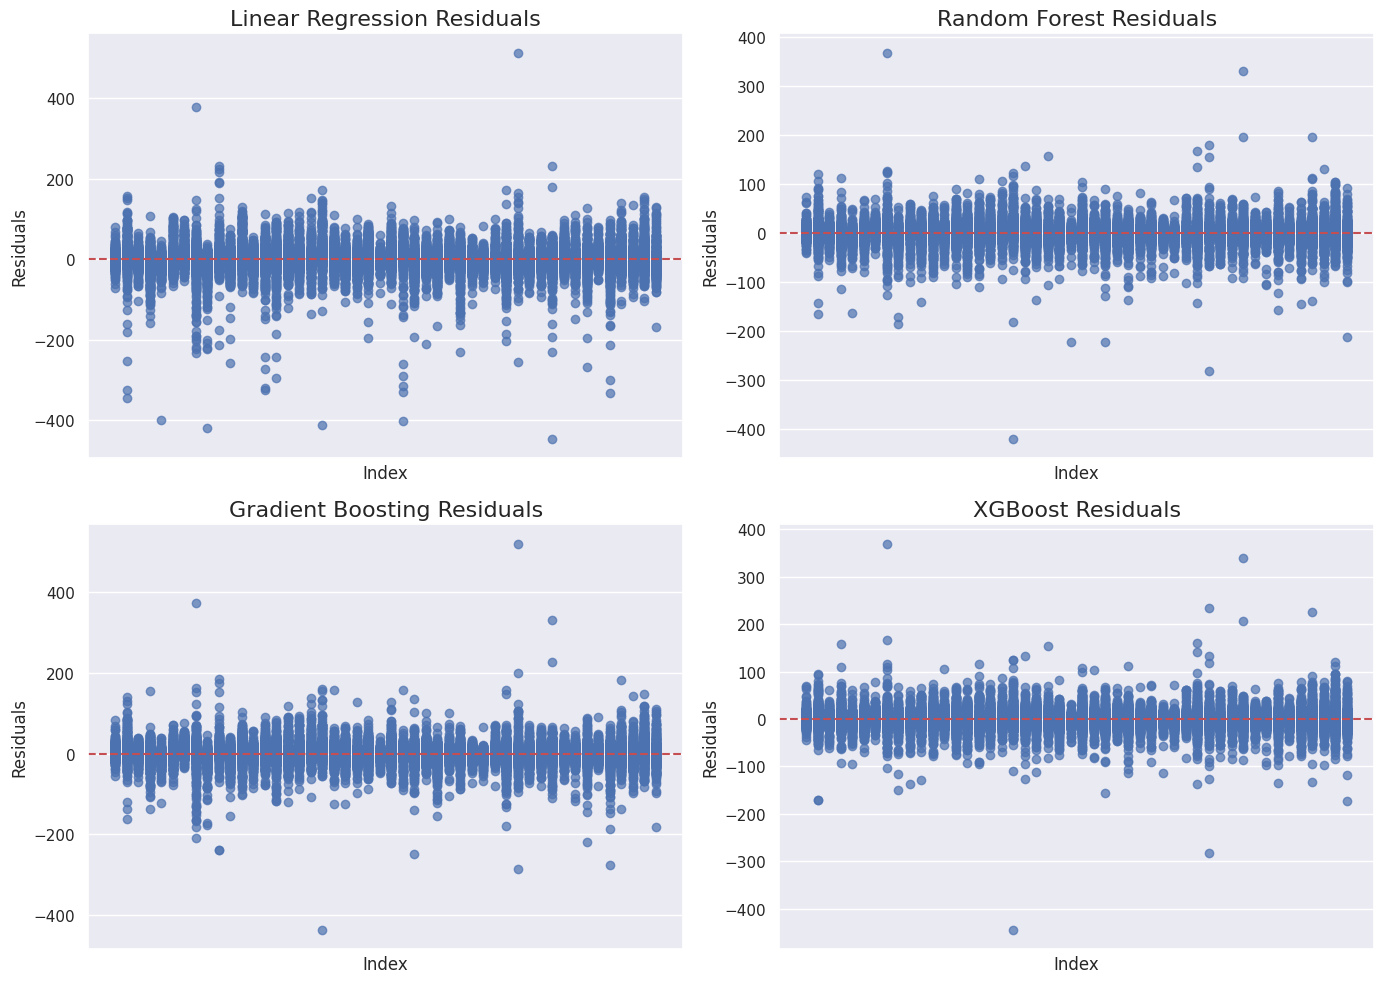

In [58]:
# ftn to plot residuals for each model
def plot_residuals(models, Xtest_scaled, Ytest, data):
    plt.figure(figsize=(14, 10))

    for i, (model_name, model) in enumerate(models.items(), 1):
        predicted = model.predict(Xtest_scaled)
        
        compare_data = pd.DataFrame({
            'dates': data.iloc[Ytest.index]["year_month"],
            'Actual PM2.5': Ytest,
            'Predicted PM2.5': predicted
        }).reset_index(drop=True)
        
        compare_data['Residuals'] = compare_data['Actual PM2.5'] - compare_data['Predicted PM2.5']

        # set date as index
        compare_data.set_index("dates", inplace=True)
        
        plt.subplot(2, 2, i)
        plt.scatter(compare_data.index, compare_data['Residuals'], alpha=0.7, color='b')
        plt.axhline(y=0, color='r', linestyle='--')  
        plt.title(f'{model_name} Residuals', fontsize=16)
        plt.xlabel('Index', fontsize=12)
        plt.ylabel('Residuals', fontsize=12)
        plt.xticks([])
        plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_residuals(models, Xtest_scaled, Ytest, data)


#### Hyperparameter Tuning
- For the best-performing model, In this case we will use `Gradient Boosting Regressor`, we will perform hyperparameter tuning using GridSearchCV to optimize the model.

In [59]:
from sklearn.model_selection import GridSearchCV

tune_model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],               
    'learning_rate': [0.01, 0.1],           
    'max_depth': [3, 5],   
    'subsample': [0.8,  1.0],   
    'loss': ['ls', 'huber']
}

# start the grid seacher
grid_search = GridSearchCV(estimator=tune_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

In [60]:
# fit the model with the training data
grid_search.fit(Xtrain_scaled, Ytrain)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'loss': ['ls', 'huber'],
                         'max_depth': [3, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error')

In [61]:
# get the best results
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# print them
print(f"Best Parameters: {best_params}")
print(f"Best MAE: {-grid_search.best_score_}")


Best Parameters: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best MAE: 12.6923909581827


In [62]:
y_pred = best_model.predict(Xtest_scaled)

mae = mean_absolute_error(Ytest, y_pred)
mse = mean_squared_error(Ytest, y_pred)
rmse = mean_squared_error(Ytest, y_pred, squared=False)
r2 = r2_score(Ytest, y_pred)

print(f"Tuned Model MAE: {mae}")
print(f"Tuned Model MSE: {mse}")
print(f"Tuned Model RMSE: {rmse}")
print(f"Tuned Model R2: {r2}")


Tuned Model MAE: 12.459310387638077
Tuned Model MSE: 419.16196799412415
Tuned Model RMSE: 20.473445435346836
Tuned Model R2: 0.9347715538989343


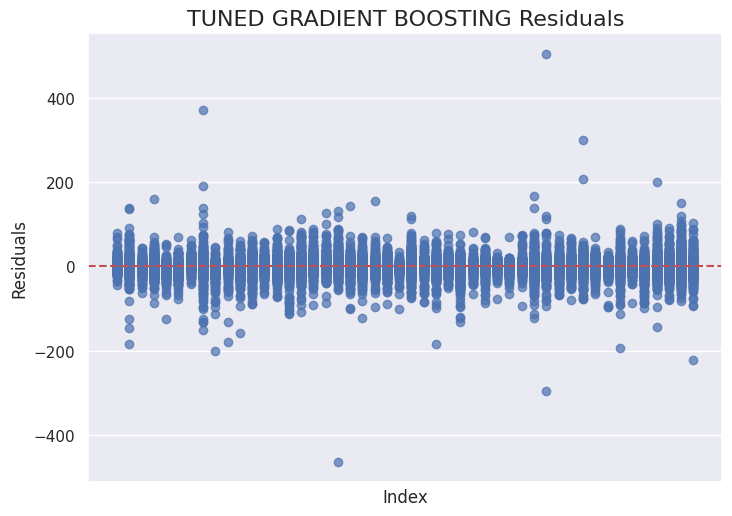

In [63]:
plot_residuals({"TUNED GRADIENT BOOSTING": best_model}, Xtest_scaled, Ytest, data)

##### Observation,
- It is observed, on optimization, the Gradient boosting perfomed very good moving from previous `MAE of about 15 to about 12 and RMSE from about 25 to about 20`. Its `R2 score also increased by 3 points`

In [64]:
# save the best model to be used for predictions
with open('gui_app/models/best_gradient_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [65]:
# also save scalers and encoders

with open('gui_app/models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


with open('gui_app/models/encoder_wd.pkl', 'wb') as f:
    pickle.dump(encoder_wd, f)


with open('gui_app/models/encoder_station.pkl', 'wb') as f:
    pickle.dump(encoder_station, f)

In [66]:
# also save the data
data.to_csv("gui_app/data/cleaned_data.csv", index=False)

In [67]:
def predict_air_quality(user_input, model, scaler, encoder_wd, encoder_station):
    """
    Function to make predictions on air quality data based on user input.

    Parameters:
    user_input (dict): A dictionary with keys as the feature names and values as the feature data.
    model (sklearn model): The trained model (e.g., a regressor or classifier).
    scaler (sklearn transformer): The fitted scaler used for scaling the input data.
    encoder_wd (sklearn encoder): The fitted encoder for the 'wd' (wind direction) feature.
    encoder_station (sklearn encoder): The fitted encoder for the 'station' feature.

    Returns:
    float: The predicted value (e.g., PM2.5, PM10, etc.) based on the model.
    """

    if user_input["wd"] not in encoder_wd.classes_:
        return False, f"YOur WD Input {user_input['wd']} Is incorrect, available wind directions are {list(encoder_wd.classes_)}"


    if user_input["station"] not in encoder_station.classes_:
        return False, f"YOur Station Input {user_input['wd']} Is incorrect, available wind directions are {list(encoder_station.classes_)}"
    
    # convert user input dictionary to DataFrame
    user_df = pd.DataFrame([user_input])

    # encode categorical features (wind direction and station)
    user_df['wd'] = encoder_wd.transform(user_df['wd'].values.reshape(-1, 1))
    user_df['station'] = encoder_station.transform(user_df['station'].values.reshape(-1, 1))

    # Scaling the features
    scaled_data = scaler.transform(user_df[['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']])

    # Make prediction
    prediction = model.predict(scaled_data)
    
    return True, prediction[0]


In [68]:
# Example of user input
user_input = {
    'year': 2013,
    'month': 3,
    'day': 1,
    'hour': 0,
    'PM10': 9.0,
    'SO2': 3.0,
    'NO2': 17.0,
    'CO': 300.0,
    'O3': 89.0,
    'TEMP': -0.5,
    'PRES': 1024.5,
    'DEWP': -21.4,
    'RAIN': 0.0,
    'wd': 'SSW',
    'WSPM': 5.7,
    'station': 'Dongsi',
}

prediction = predict_air_quality(user_input, model, scaler, encoder_wd, encoder_station)

if not prediction[0]:
    print(prediction[1])
else:
    print(f"Predicted PM2.5: {prediction[1]}")


Predicted PM2.5: 1.1780575513839722
